In [1]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import dill
from tqdm import tqdm
import sys
import os
import gc

# Get the current working directory
current_dir = os.getcwd()
# Add the parent directory to sys.path
sys.path.append(os.path.dirname(current_dir))

In [2]:
from analyze.report import draw_rate_vs_angle_pop, draw_spikes_and_psth_bothside, plot_cf_intervals_grid, plot_tonotopic_heatmaps

/home/utente/sl_plots/hears_env_linux/lib/python3.12/site-packages/setuptools/_distutils/_msvccompiler.py:12: UserWarning: _get_vc_env is private; find an alternative (pypa/distutils#340)
  warnings.warn(


In [3]:
# List directory contents
result_dir = '/mnt/c/Users/utente/OneDrive - Politecnico di Milano/work/sound_localization/sl_results/'
items = os.listdir(result_dir)
for item in items:
    print(item) 


clicks_1000_XXdB&TanCarney&subject_1.pic
harmonic_69dB&TanCarney&subject_1.pic
tone_0.1kHz_70dB&TanCarney&ild_only.pic
tone_0.1kHz_70dB&TanCarney&itd_only.pic
tone_0.1kHz_70dB&TanCarney&itd_only_myoga_inv.pic
tone_0.1kHz_70dB&TanCarney&itd_only_myoga_null.pic
tone_0.1kHz_70dB&TanCarney&itd_only_no_MSO_inh.pic
tone_0.1kHz_70dB&TanCarney&subject_1.pic
tone_0.1kHz_70dB&TanCarney&subject_1_myoga_inv.pic
tone_0.1kHz_70dB&TanCarney&subject_1_myoga_null.pic
tone_0.1kHz_70dB&TanCarney&subject_1_no_MSO_inh.pic
tone_0.1kHz_70dB&TanCarney&subject_2.pic
tone_0.2kHz_70dB&TanCarney&subject_1.pic
tone_0.3kHz_70dB&TanCarney&subject_1.pic
tone_0.4kHz_70dB&TanCarney&subject_1.pic
tone_0.5kHz_70dB&TanCarney&subject_1.pic
tone_0.6kHz_70dB&TanCarney&subject_1.pic
tone_0.7kHz_70dB&TanCarney&subject_1.pic
tone_0.8kHz_70dB&TanCarney&subject_1.pic
tone_0.9kHz_70dB&TanCarney&subject_1.pic
tone_1.1kHz_70dB&TanCarney&subject_1.pic
tone_1.2kHz_70dB&TanCarney&subject_1.pic
tone_1.3kHz_70dB&TanCarney&subject_1.pic
t

In [4]:
pop = 'LSO'
cues = ['subject_1', 'itd_only', 'ild_only']
sounds = ['tone_1.kHz', 'tone_0.1kHz', 'tone_10.kHz', 'whitenoise']
ylim = None

tone_1.kHz 

subject_1


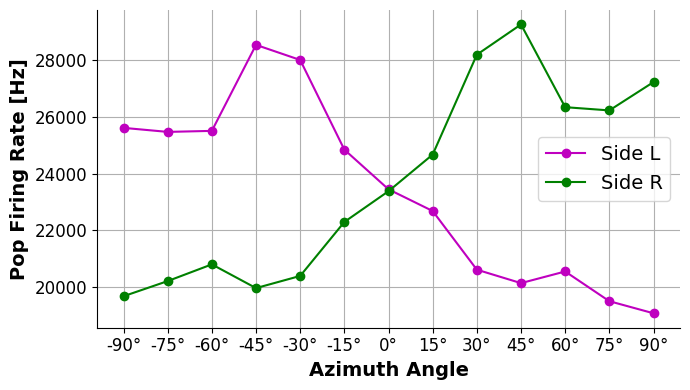

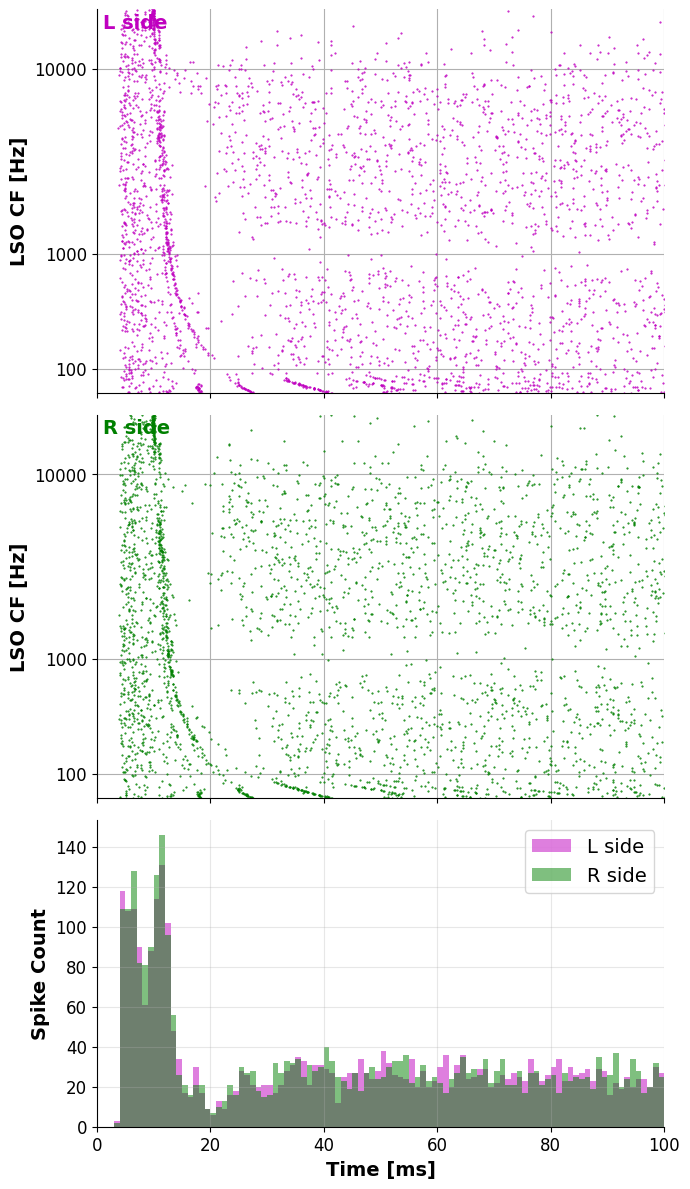

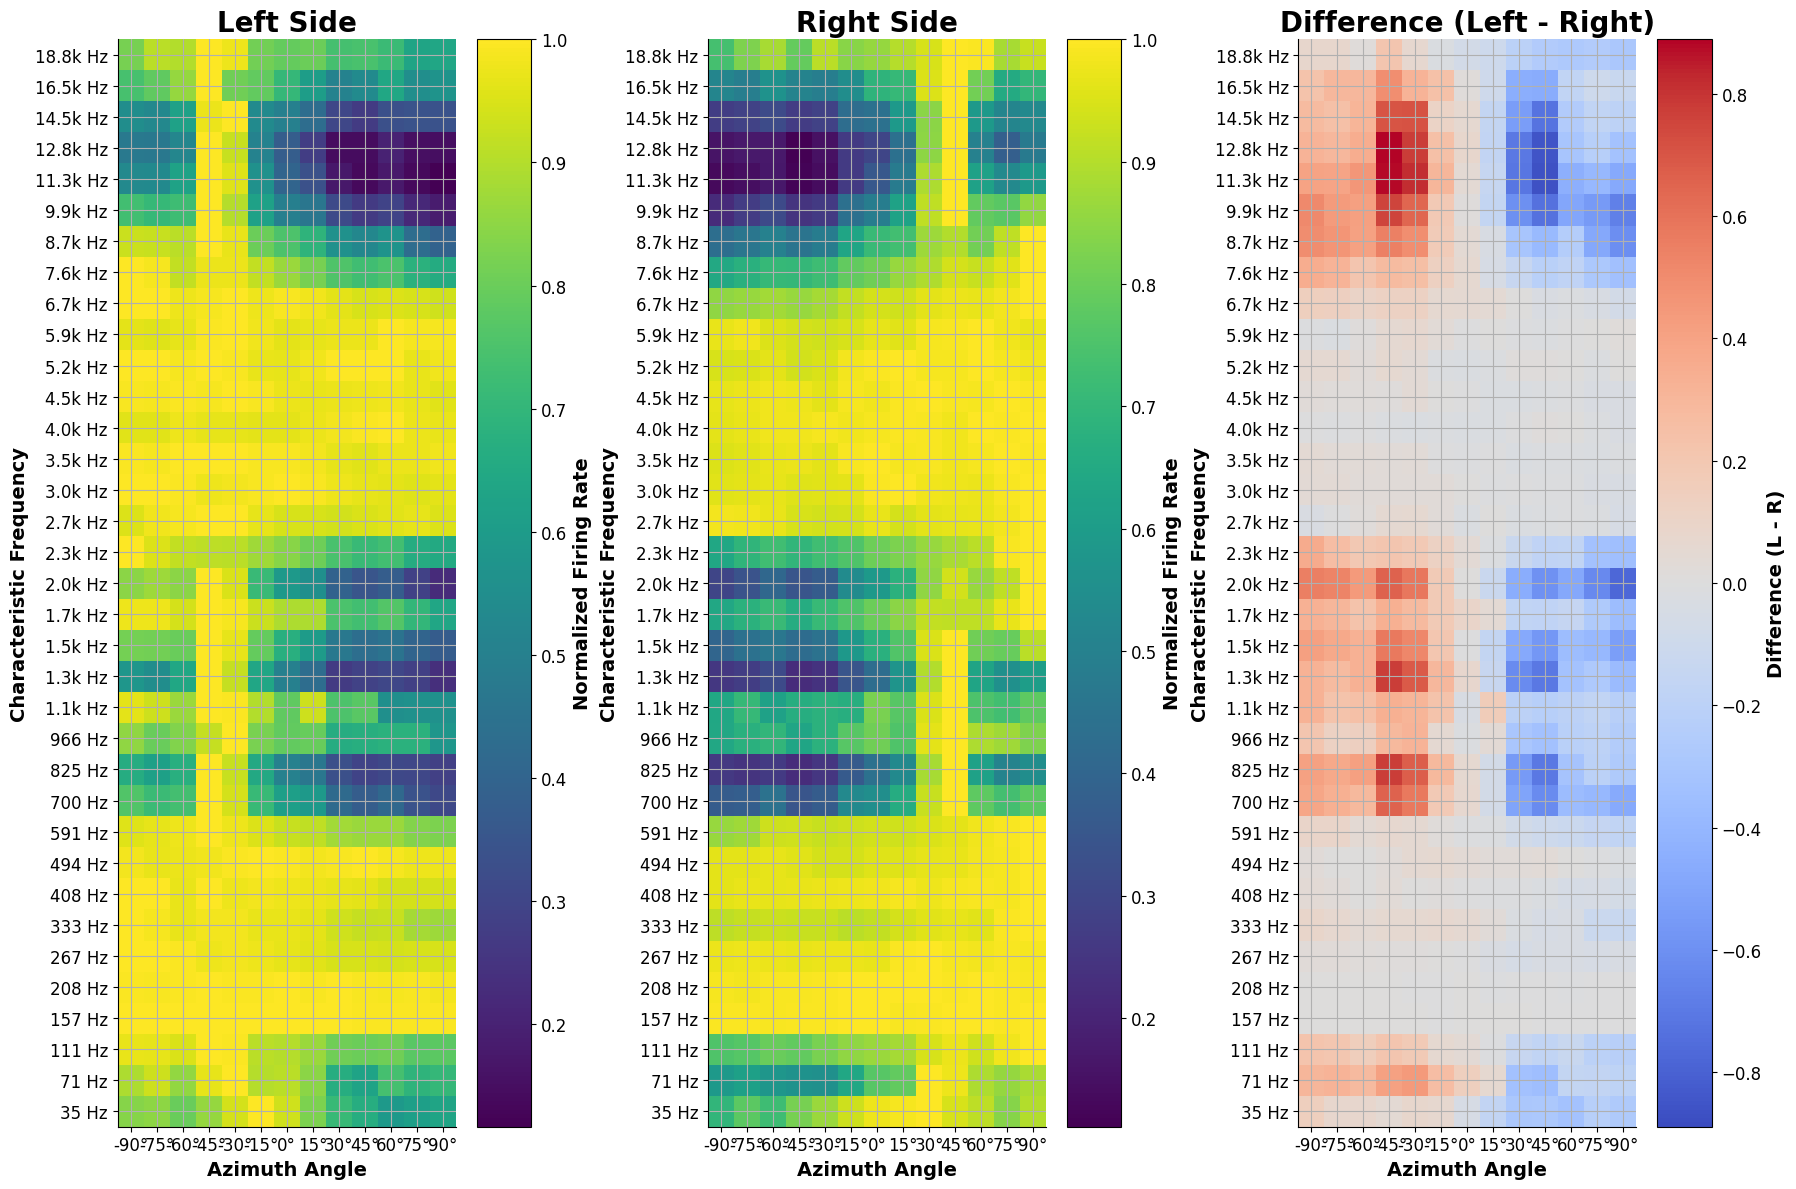

itd_only


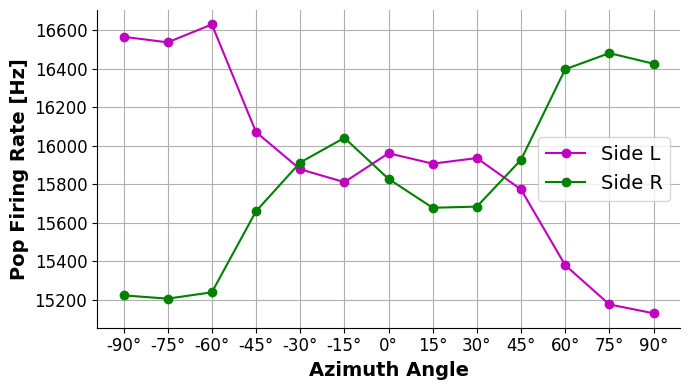

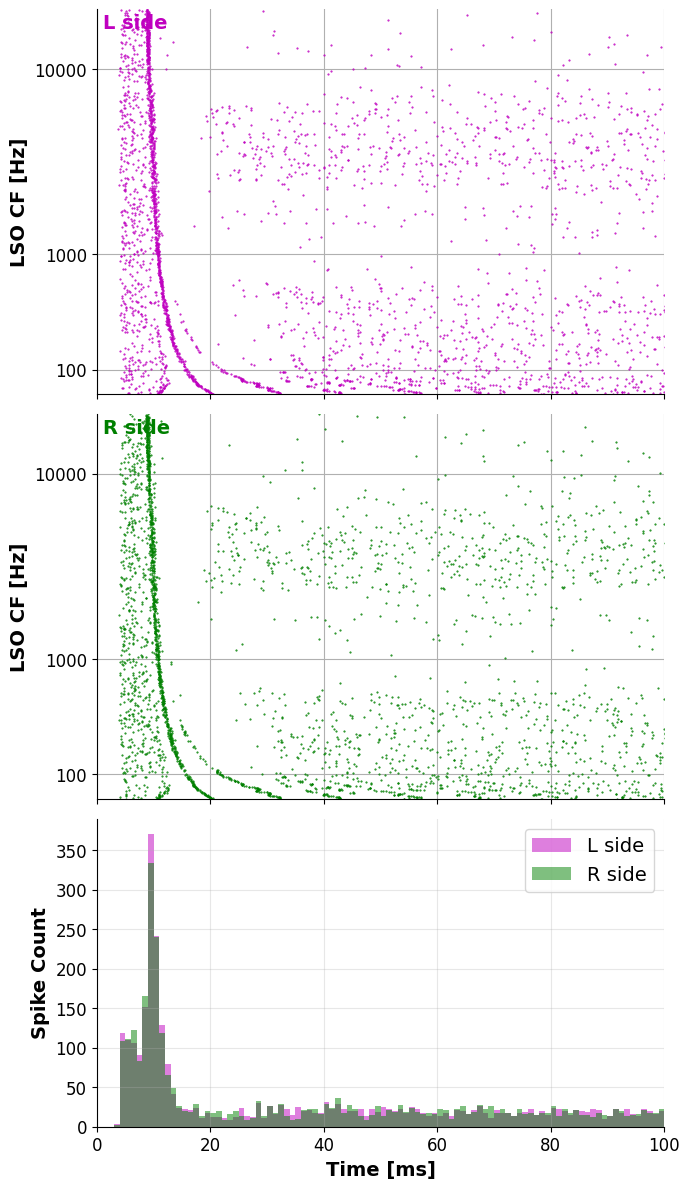

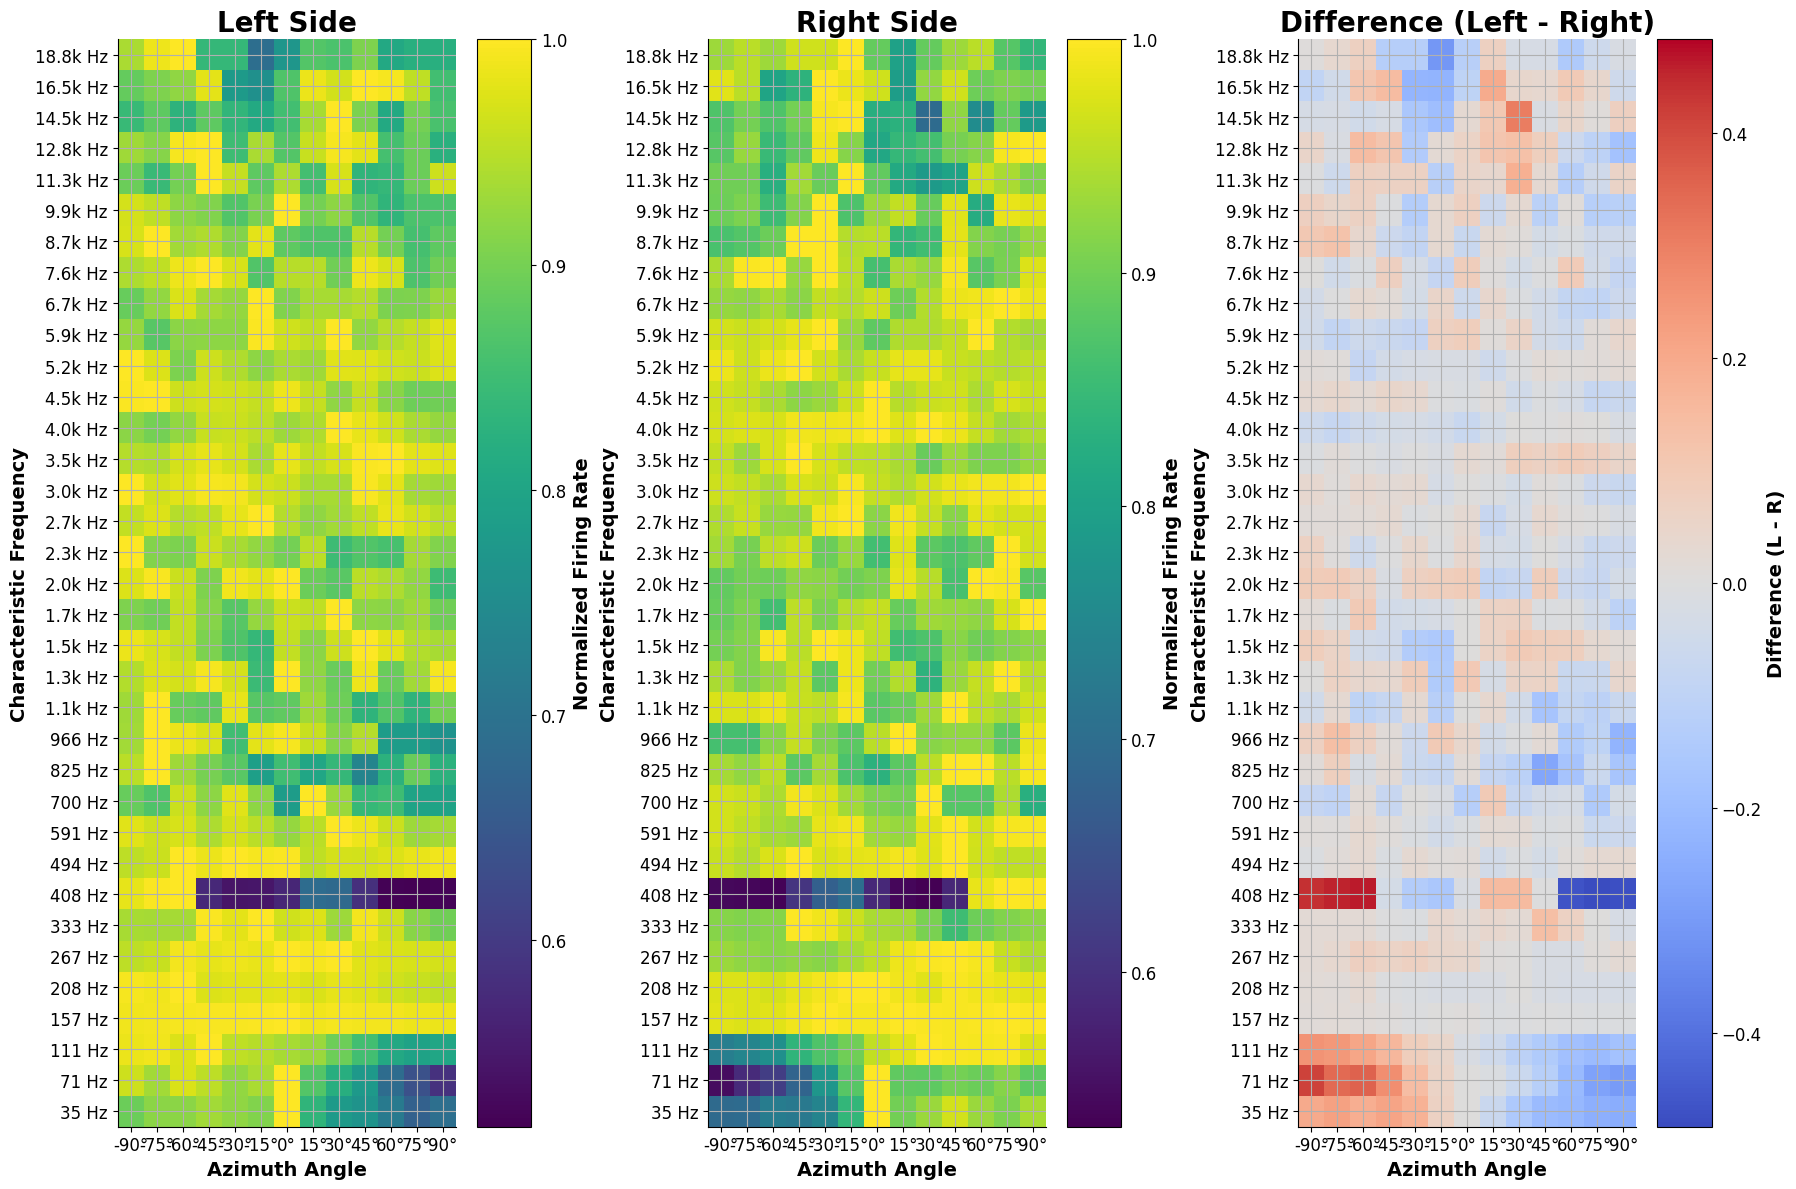

ild_only


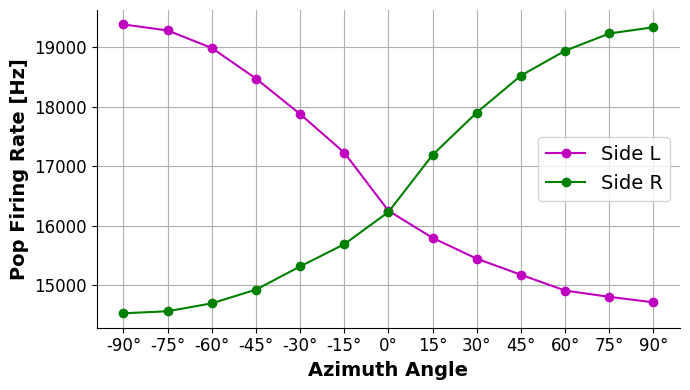

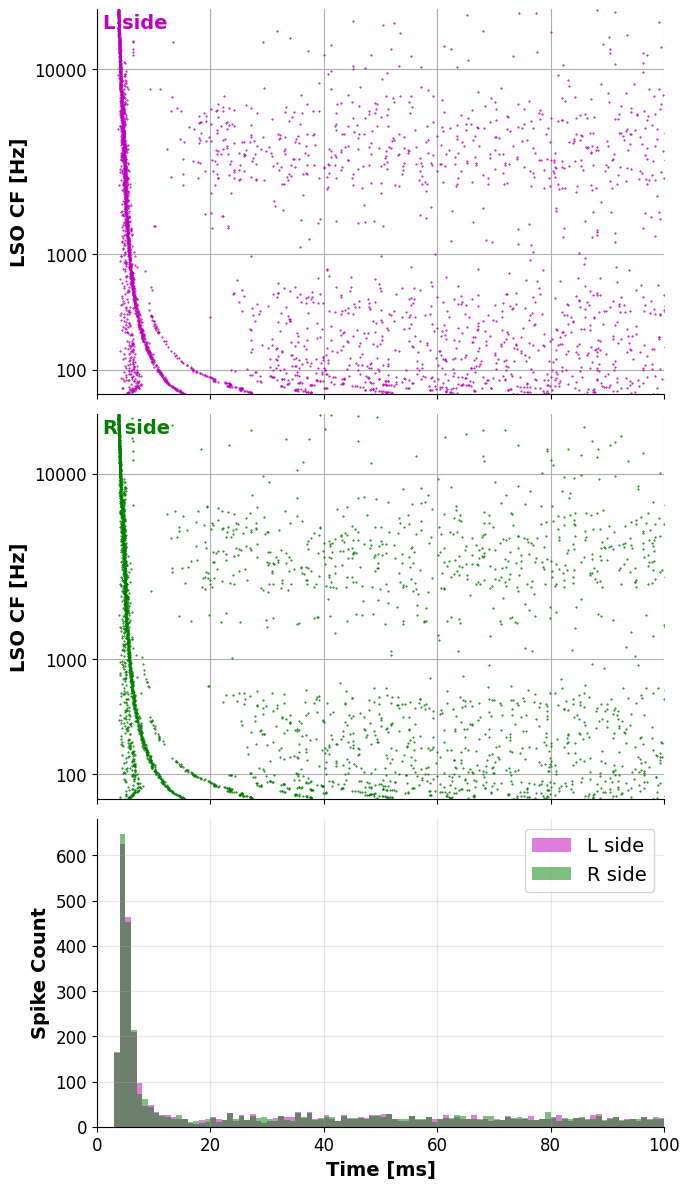

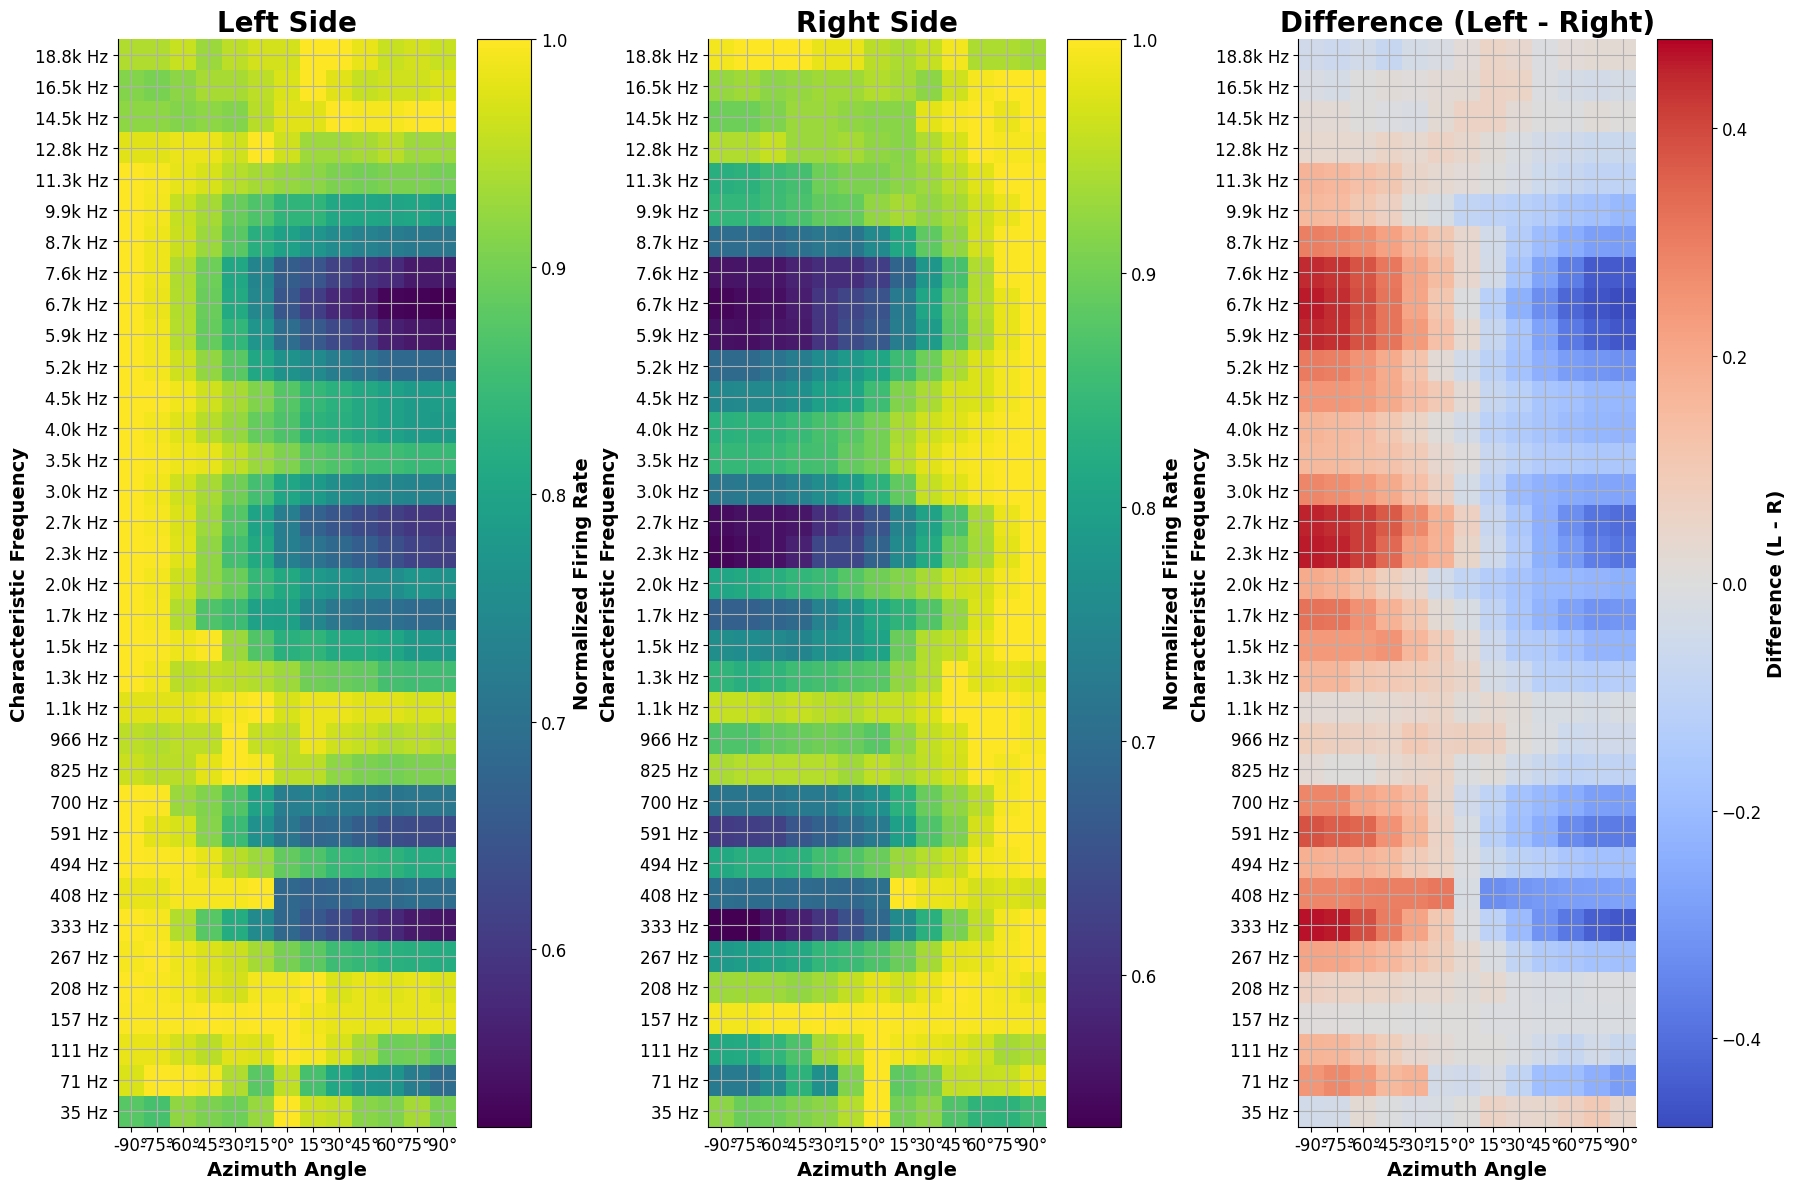

tone_0.1kHz 

subject_1


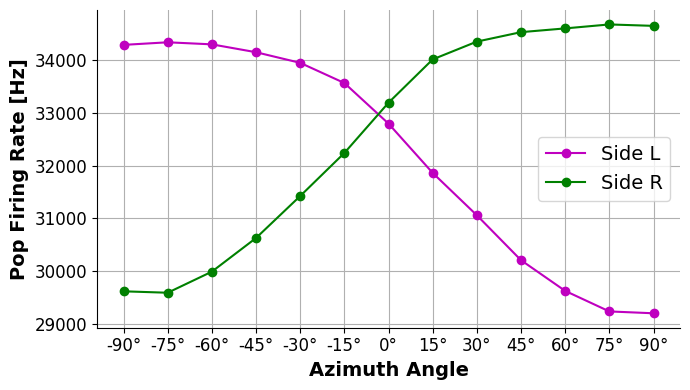

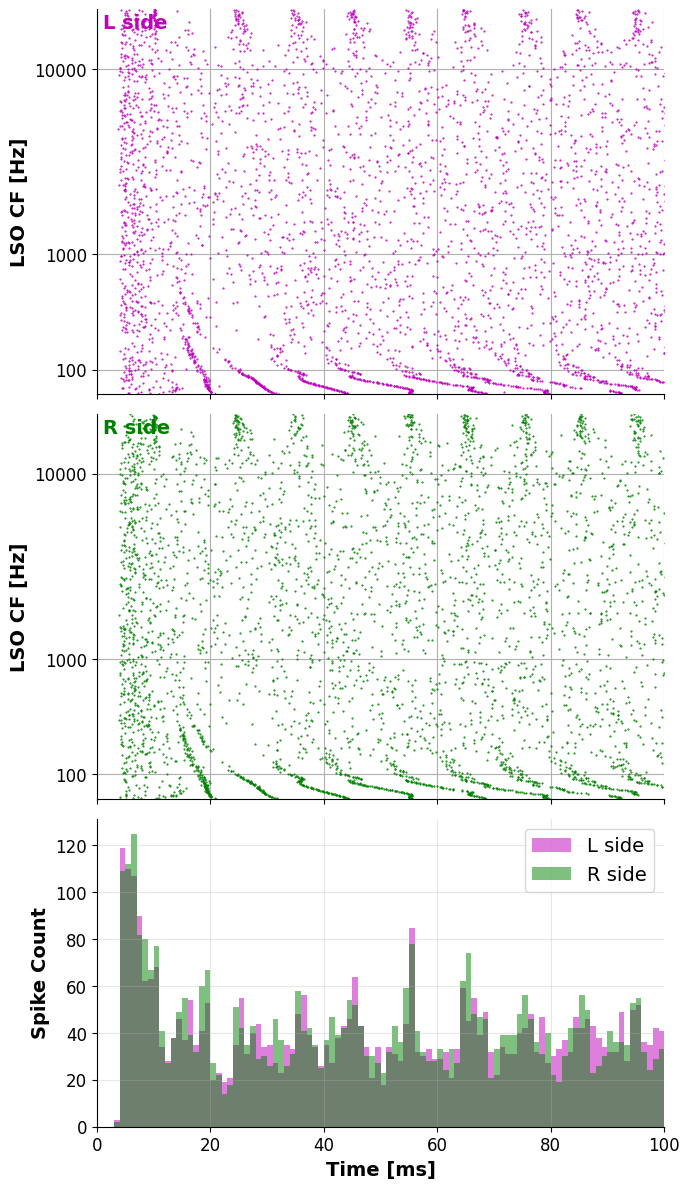

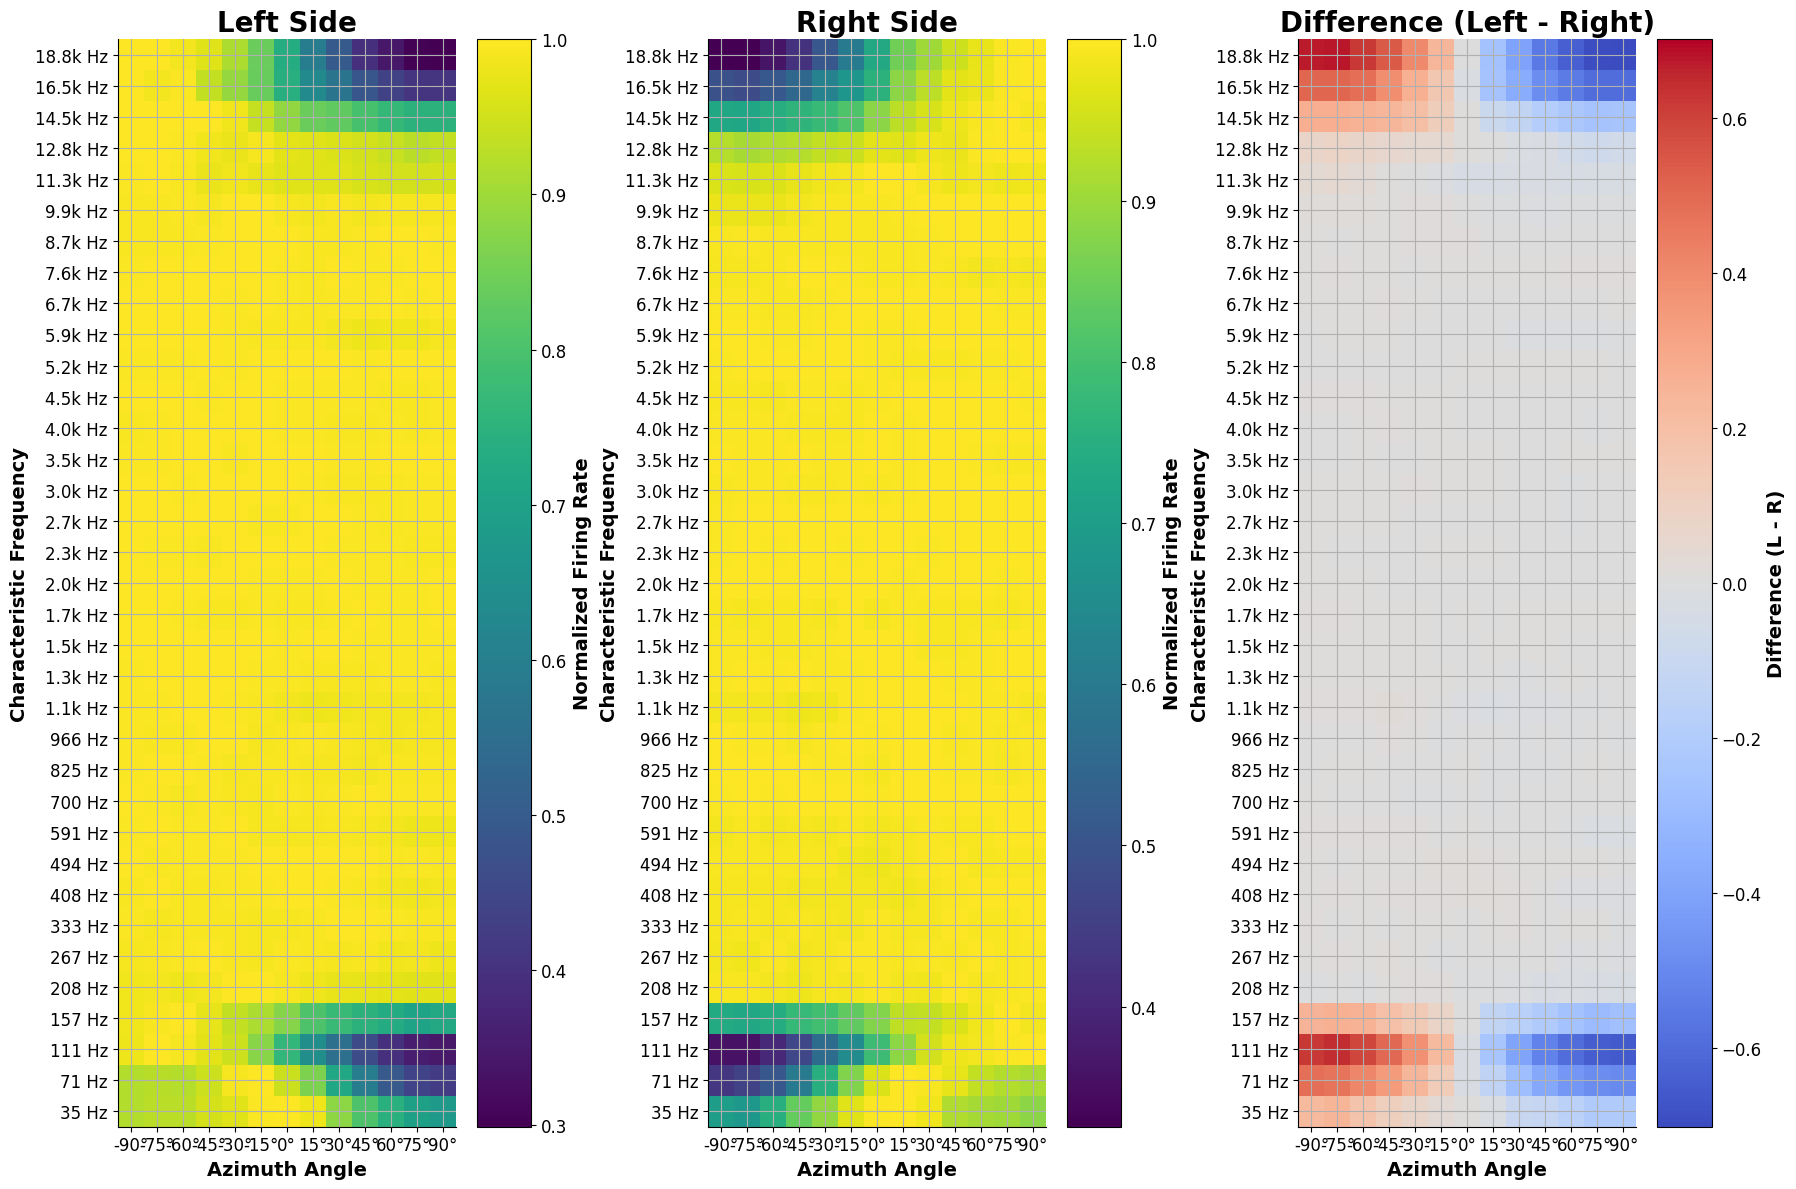

itd_only


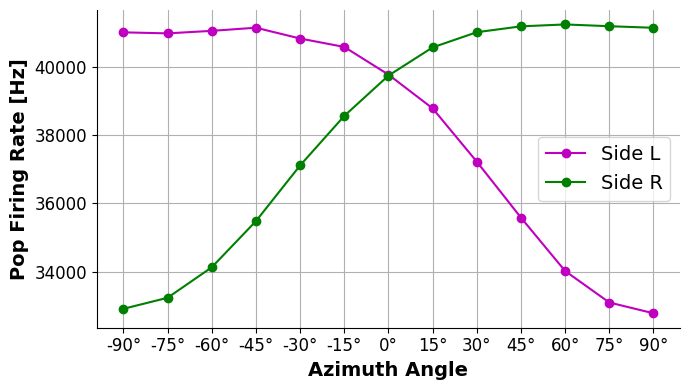

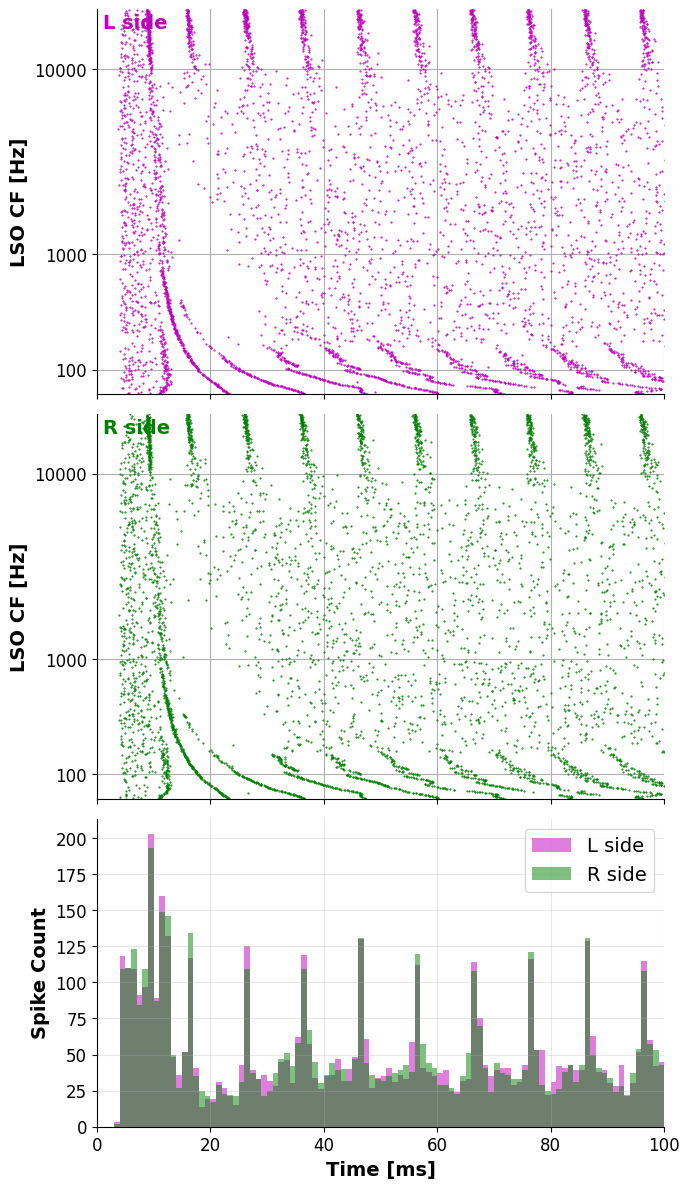

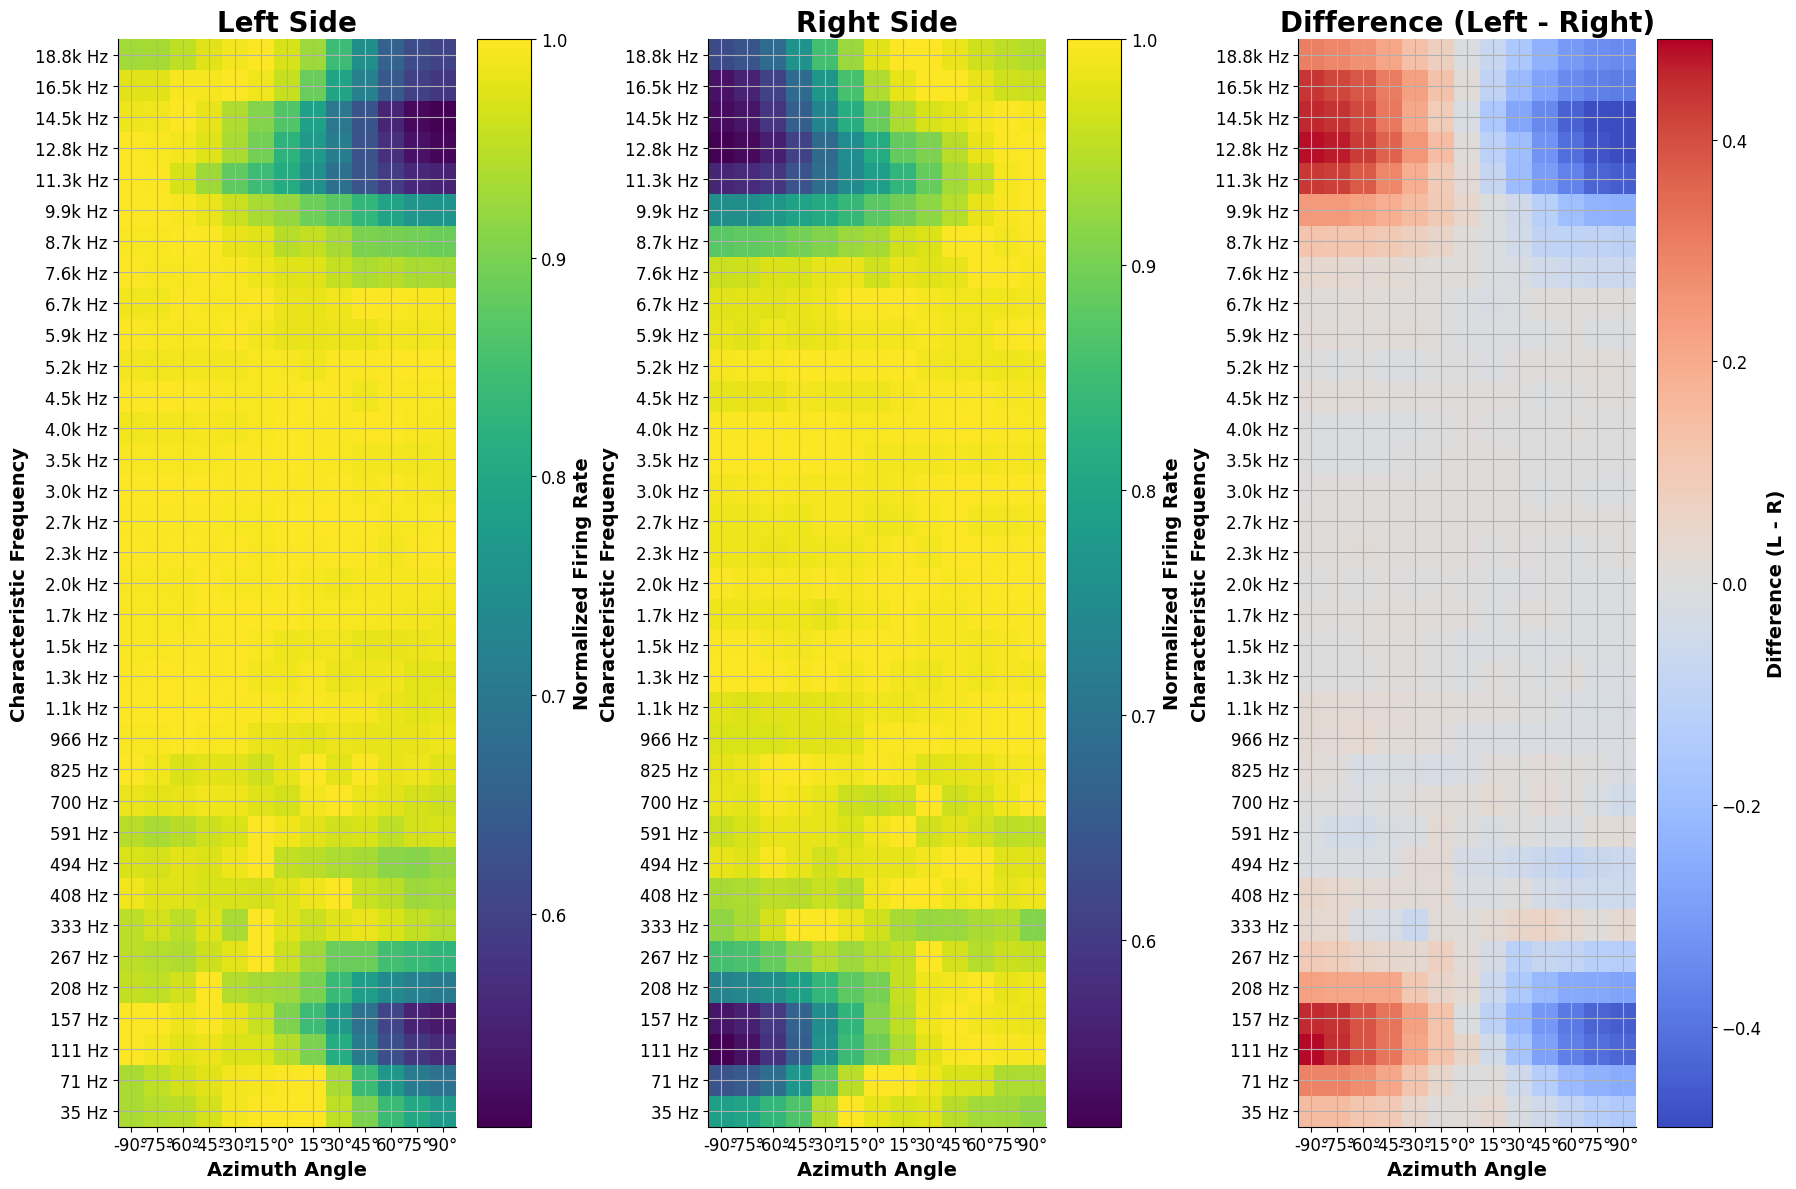

ild_only


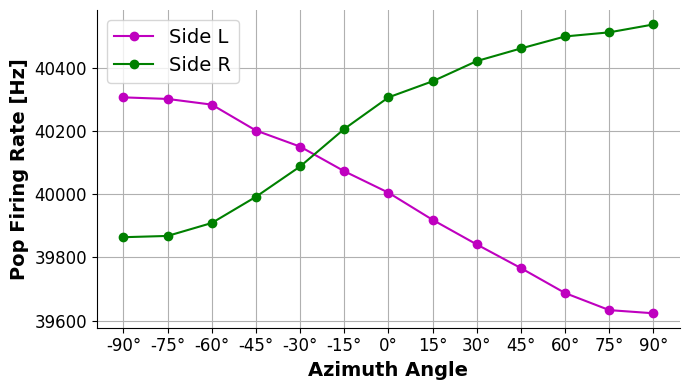

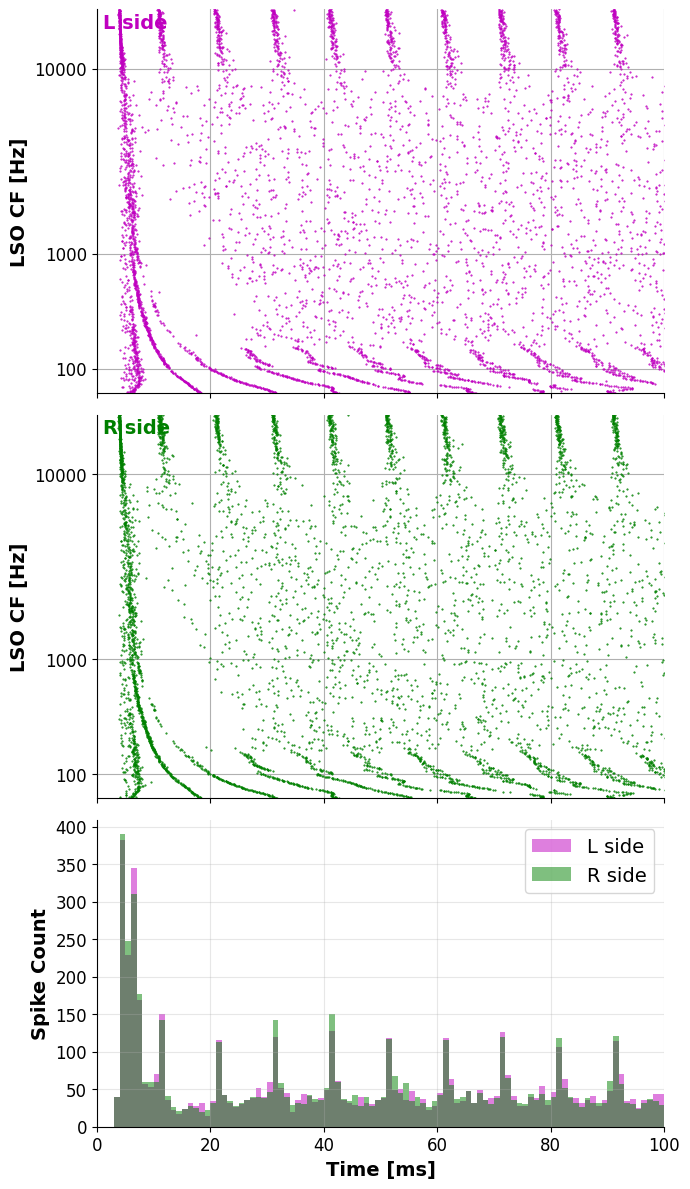

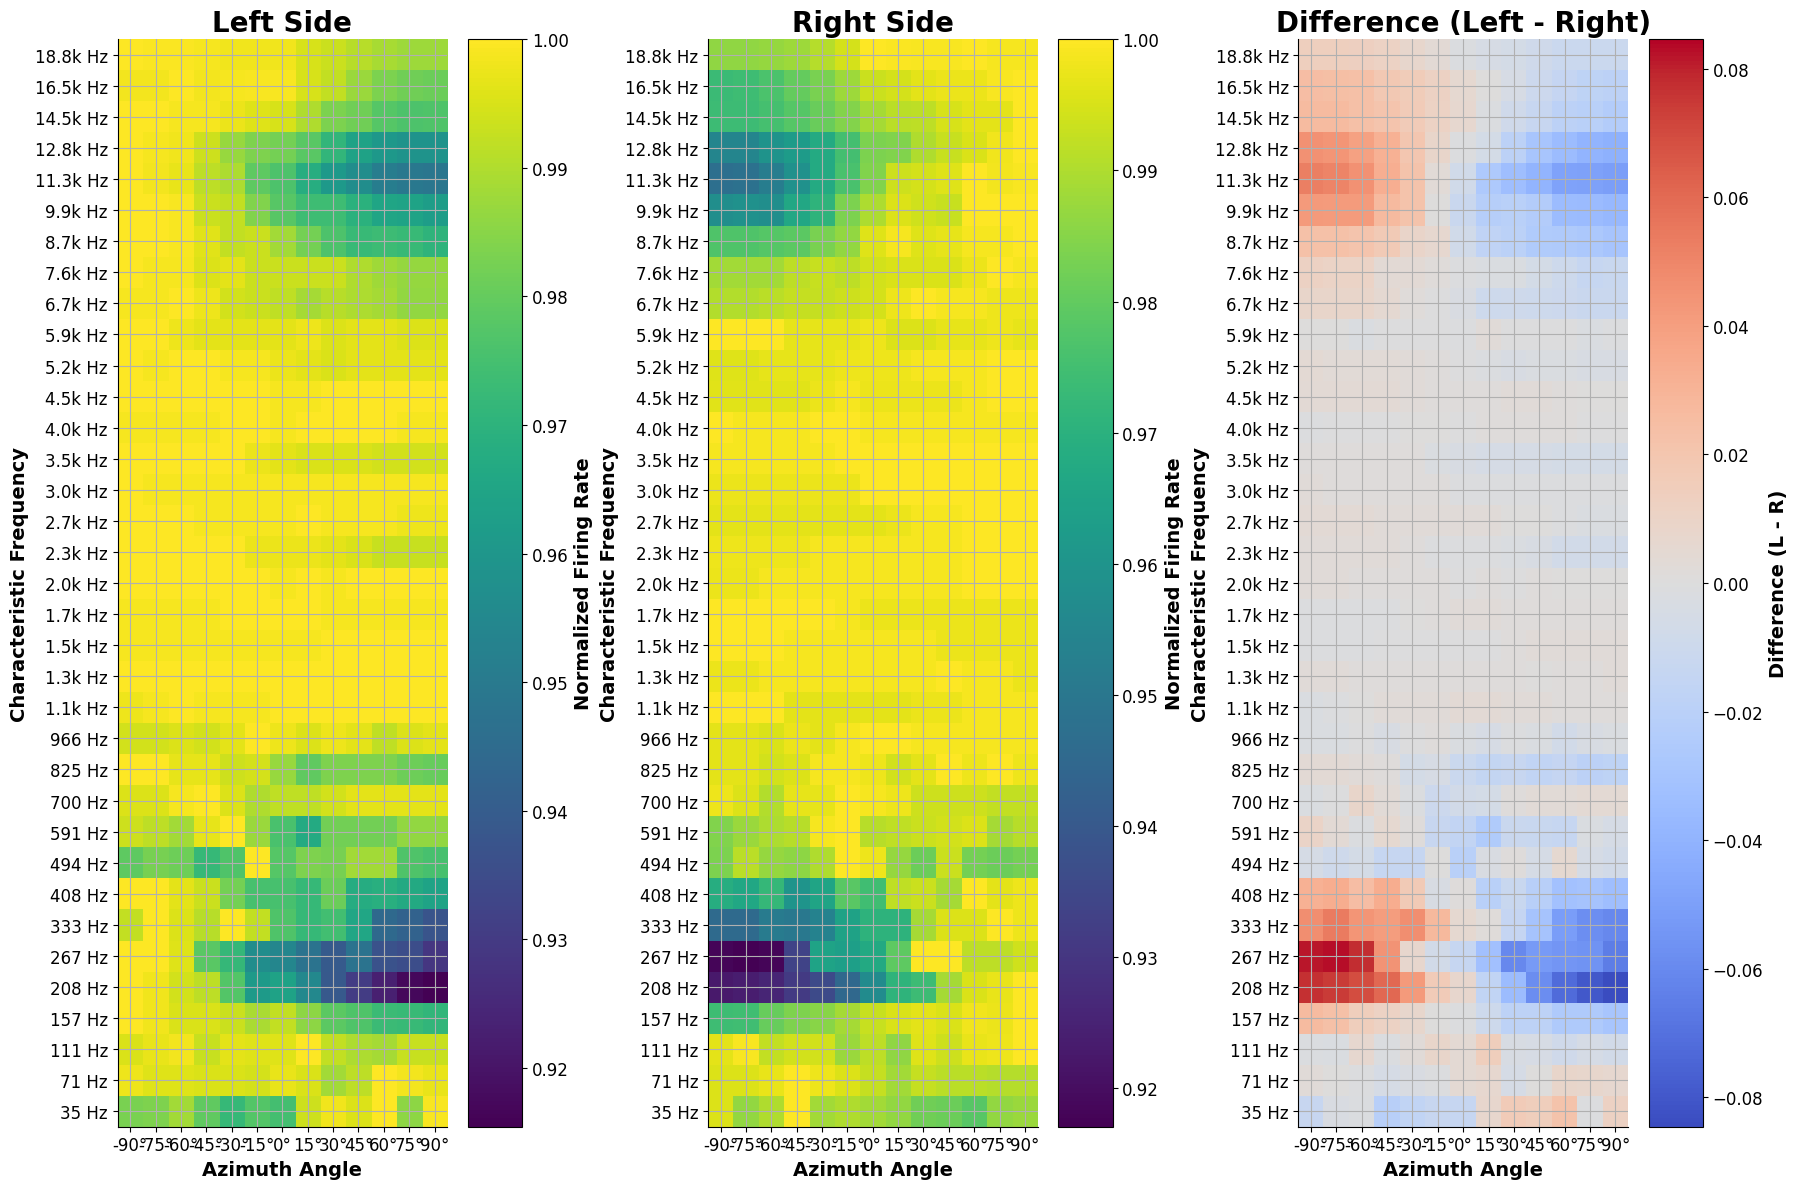

tone_10.kHz 

subject_1


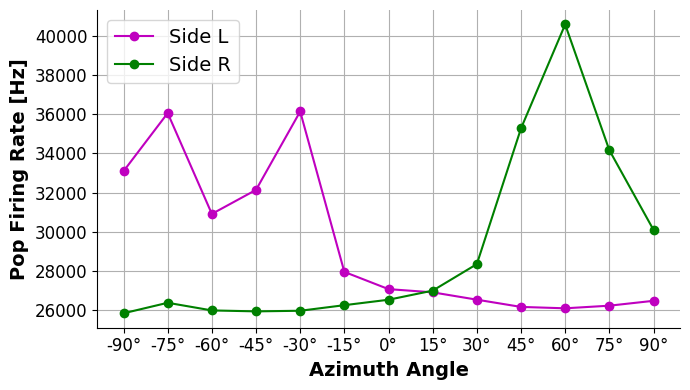

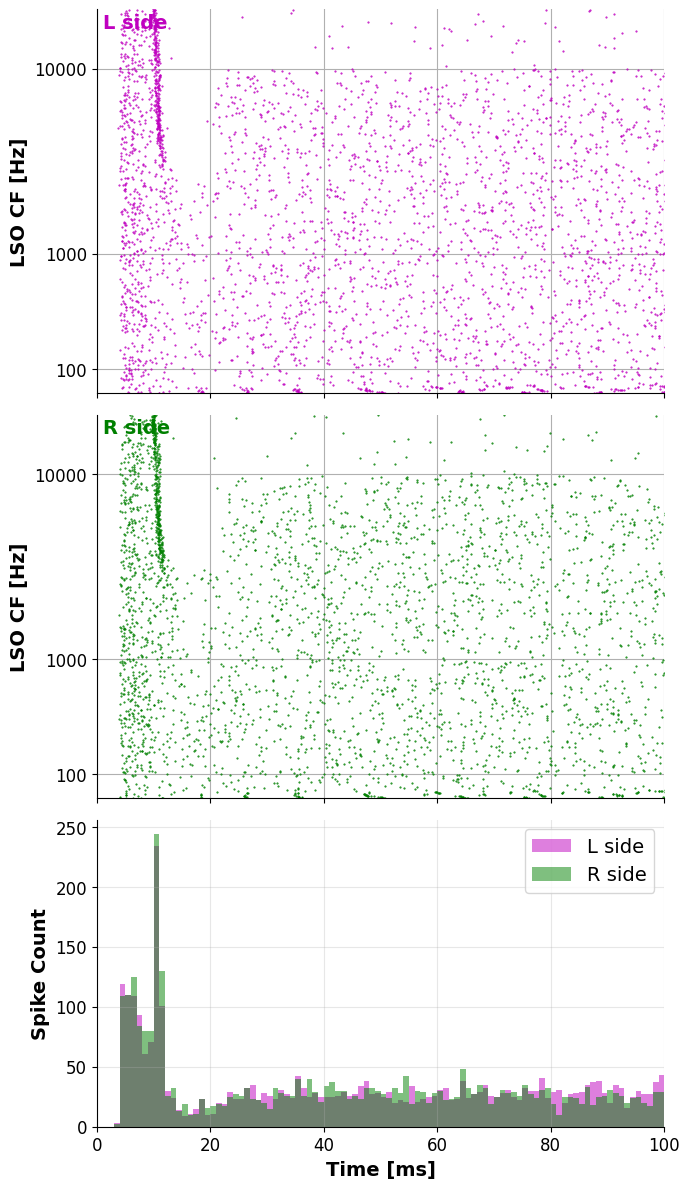

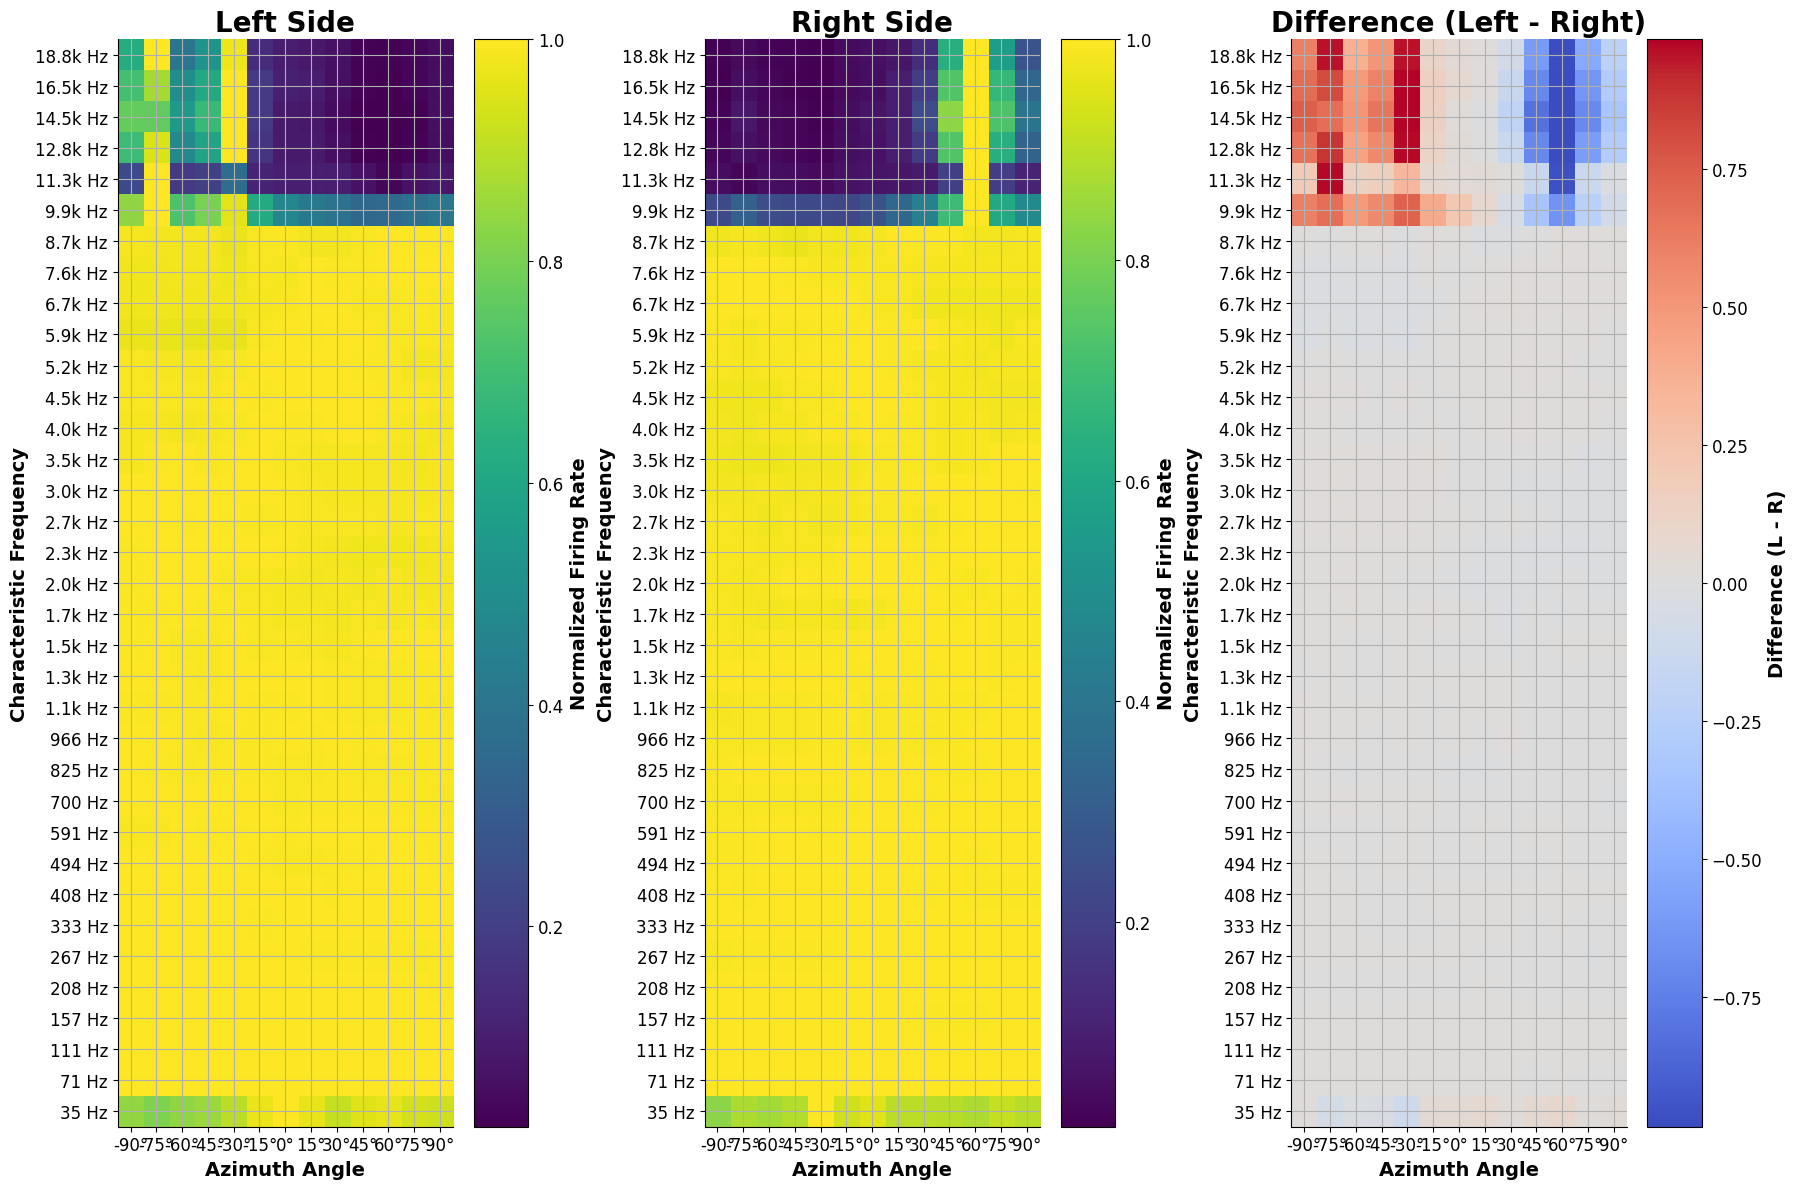

itd_only


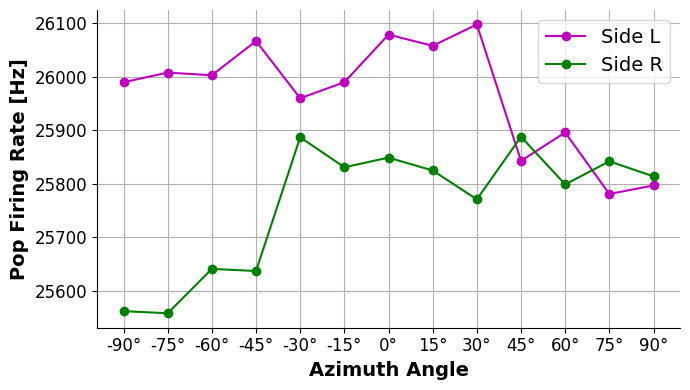

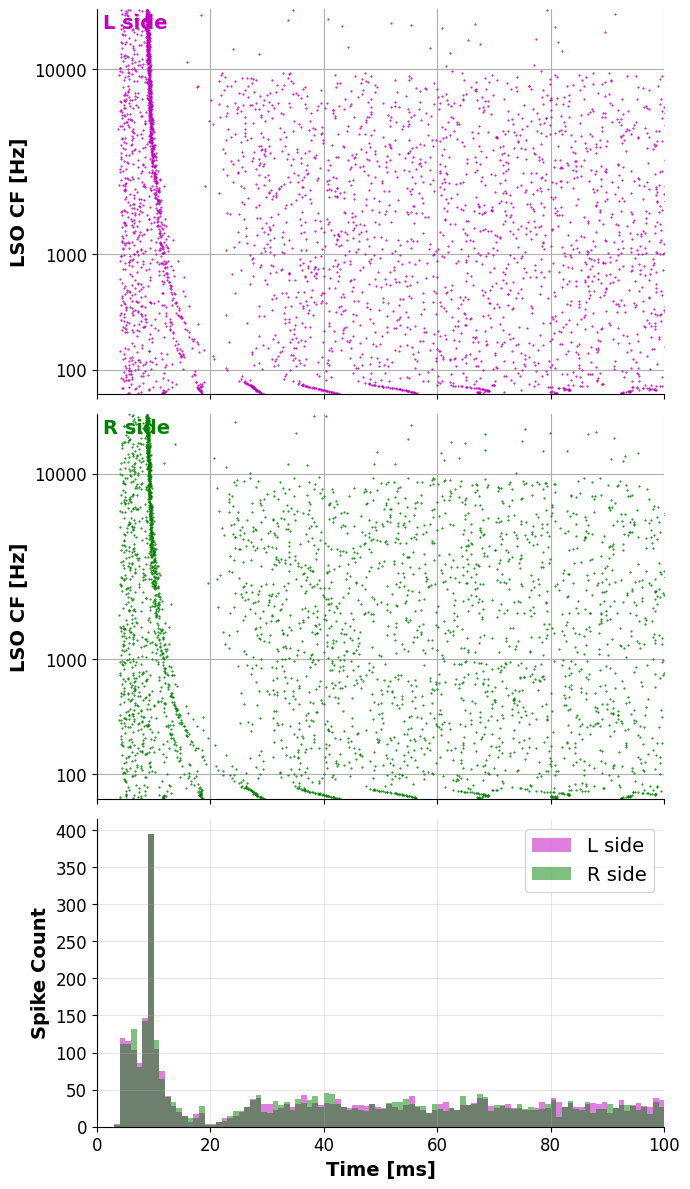

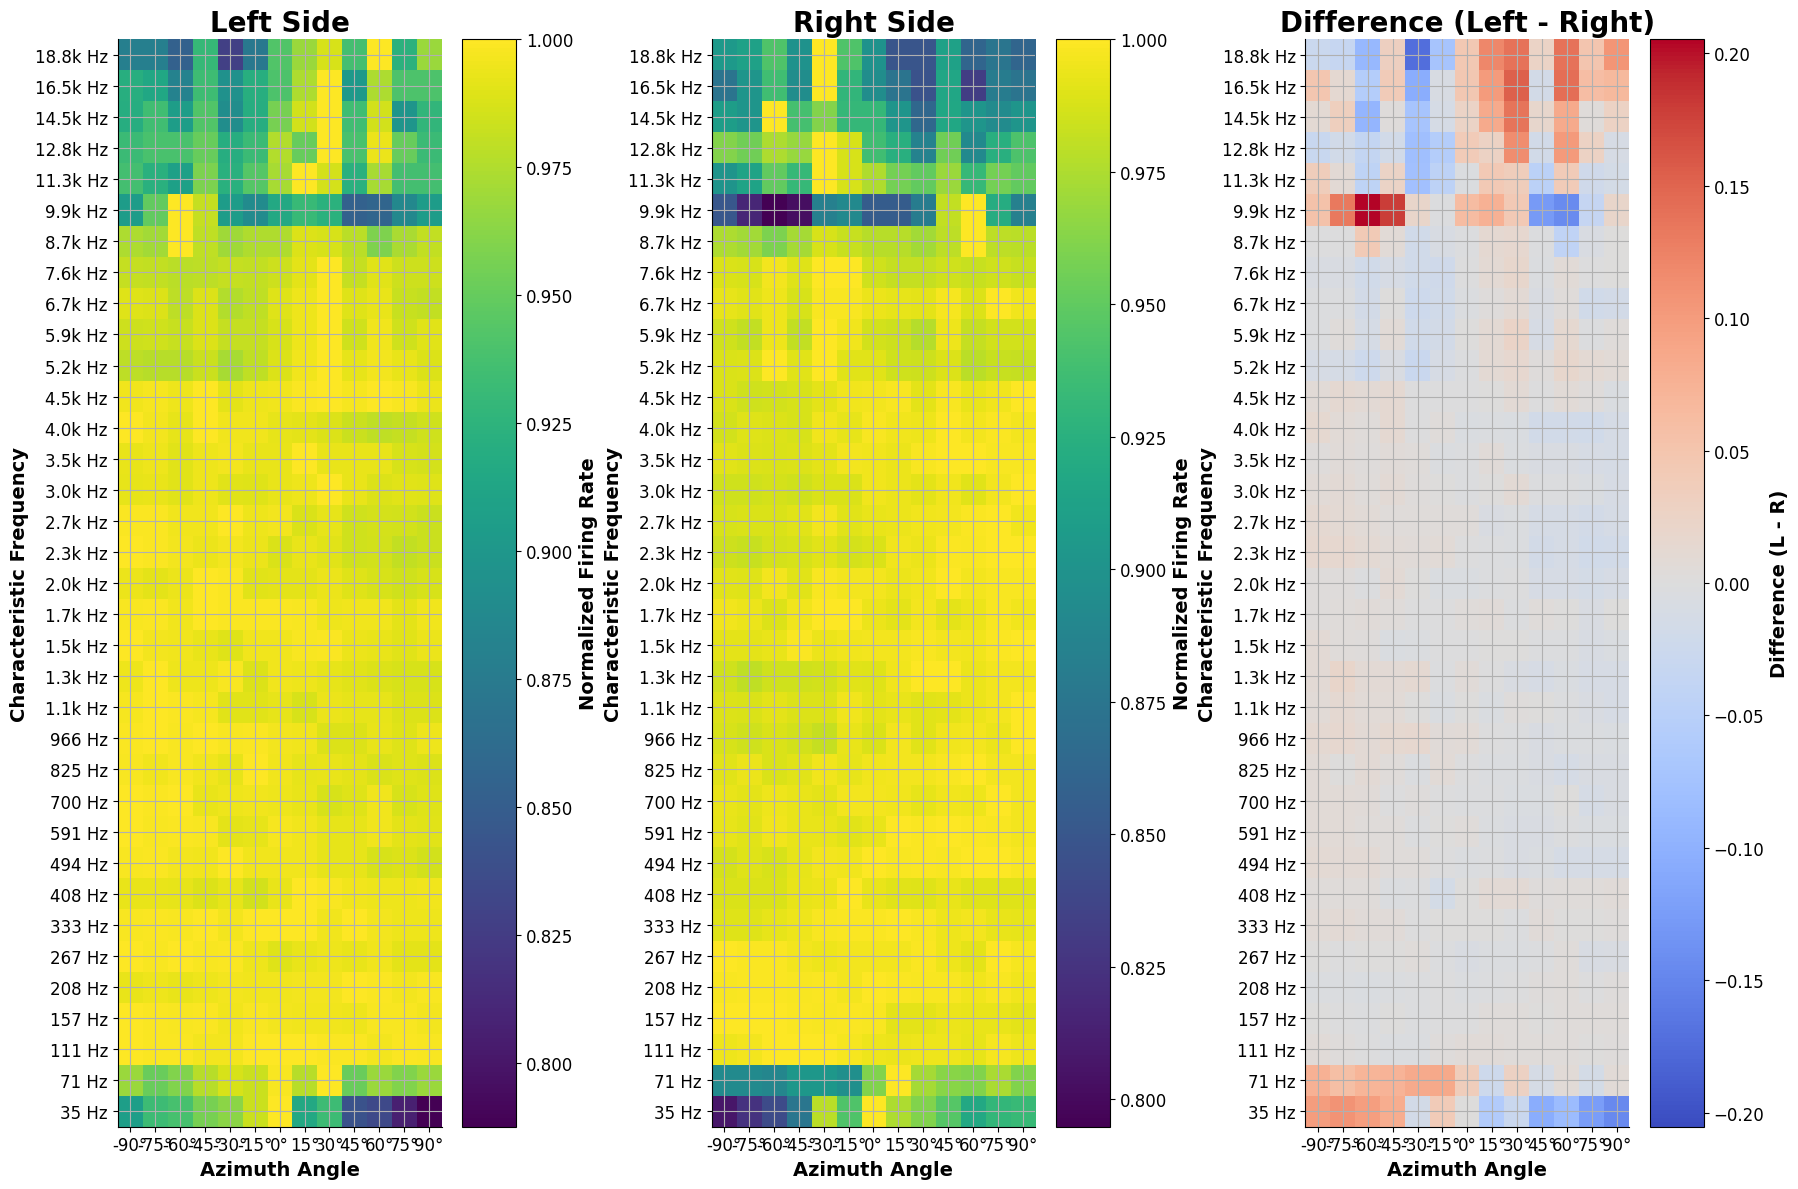

ild_only


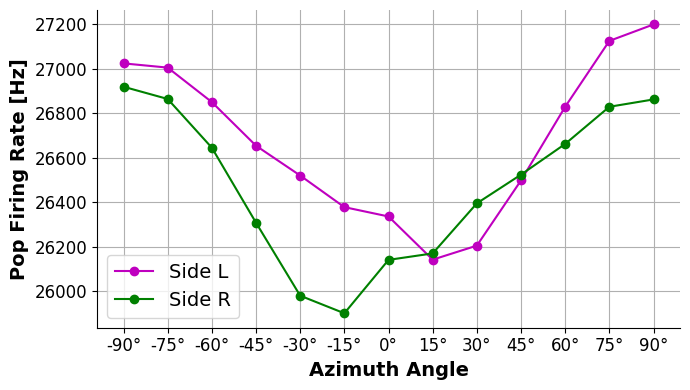

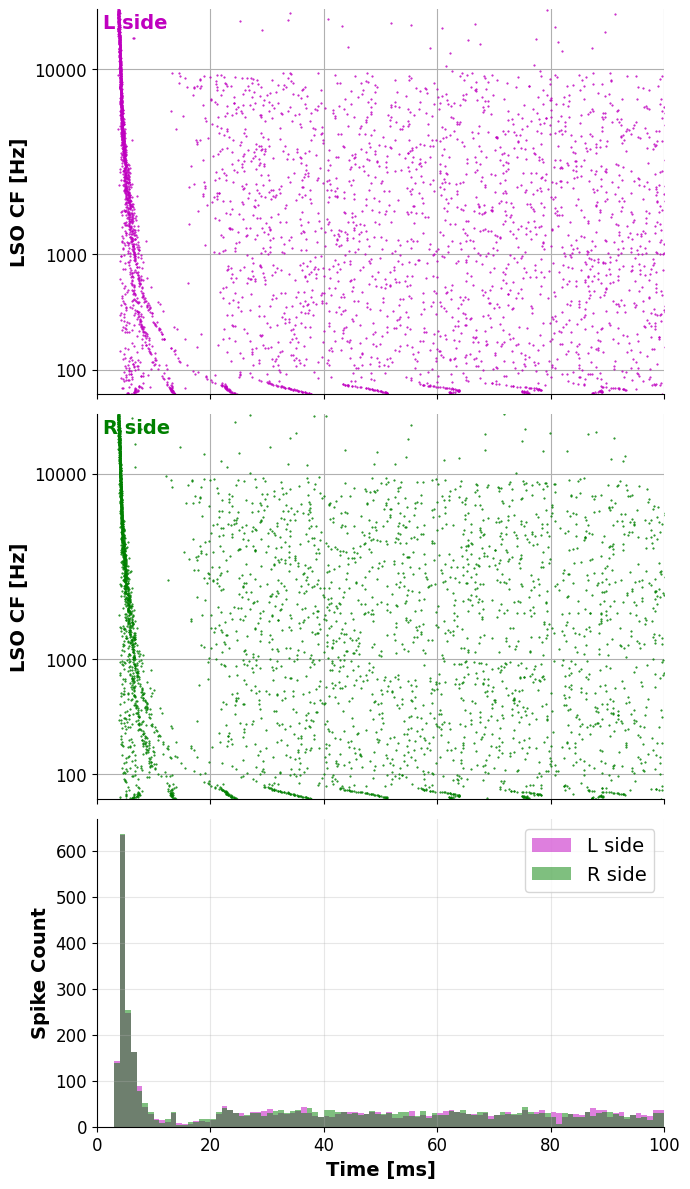

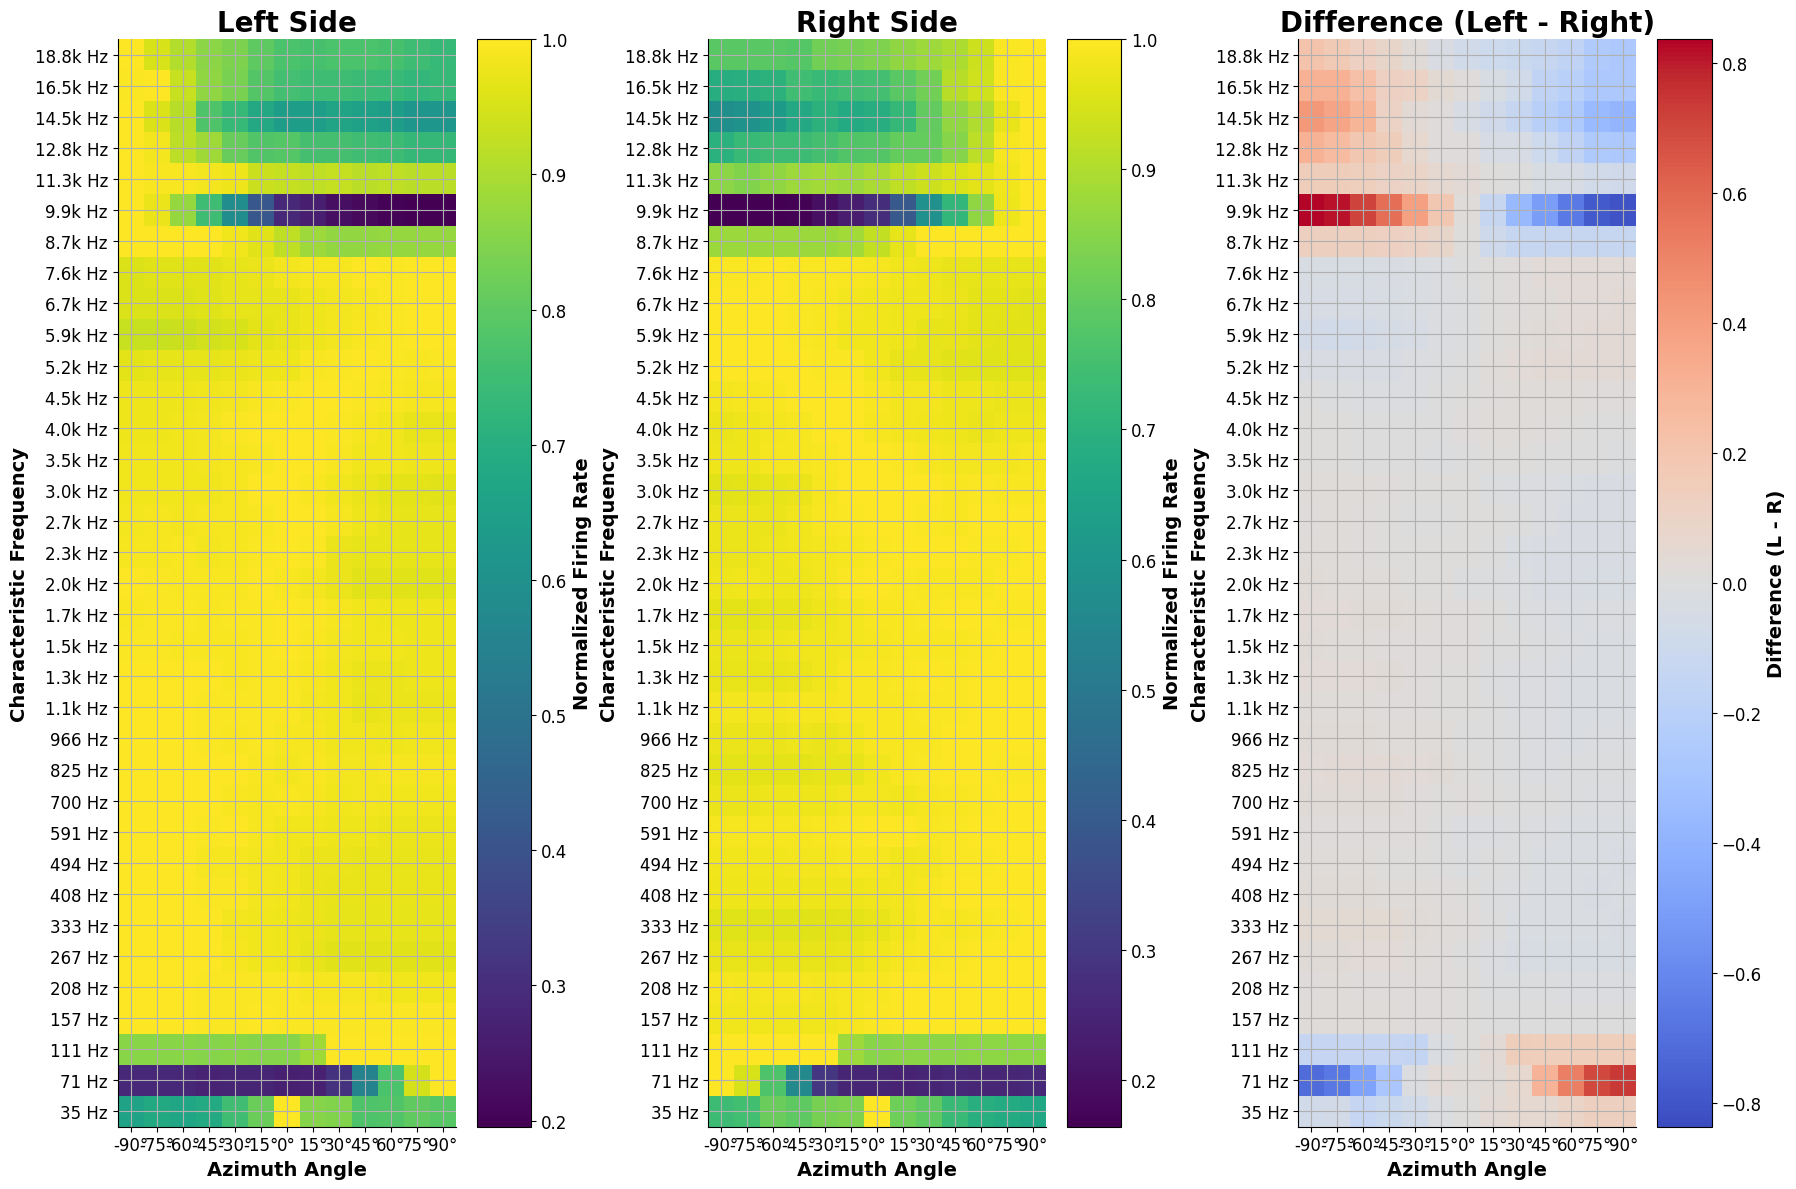

whitenoise 

subject_1


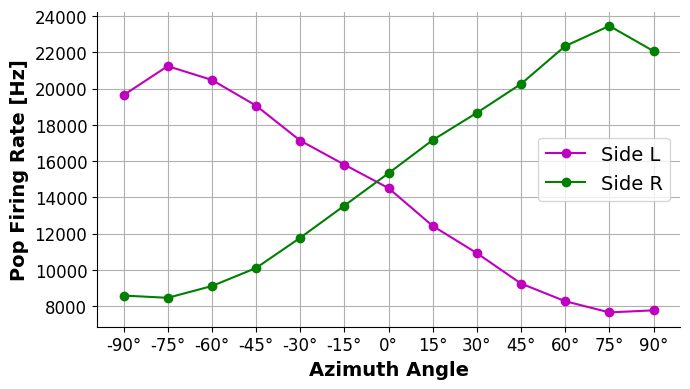

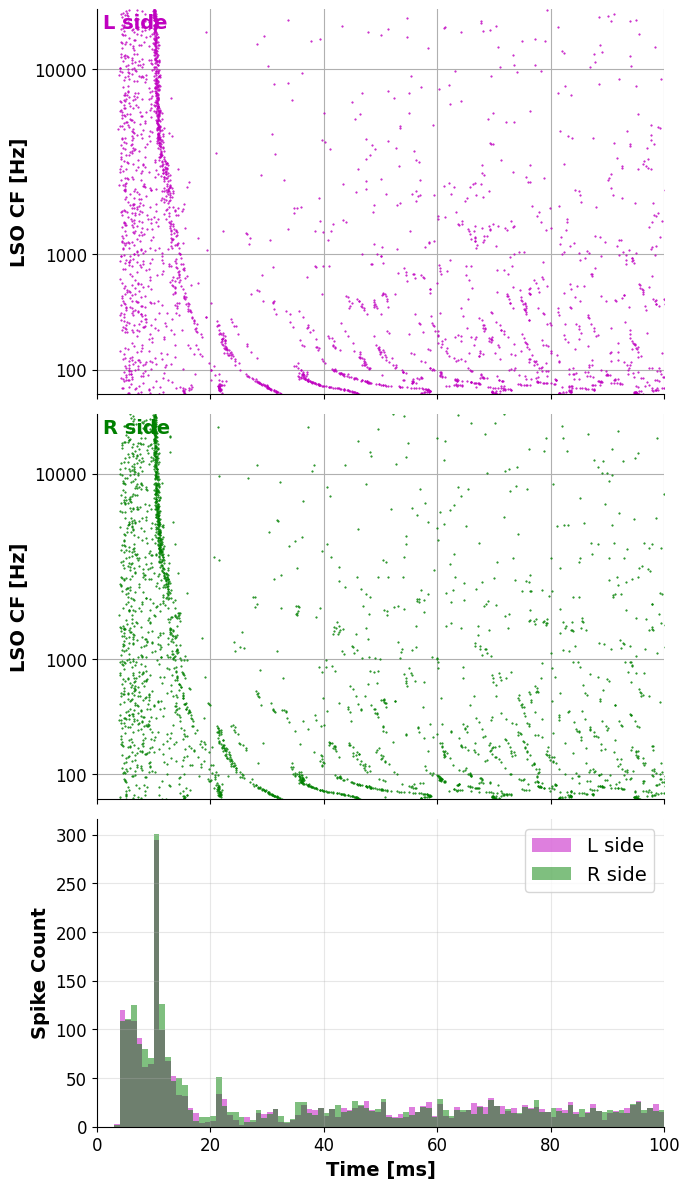

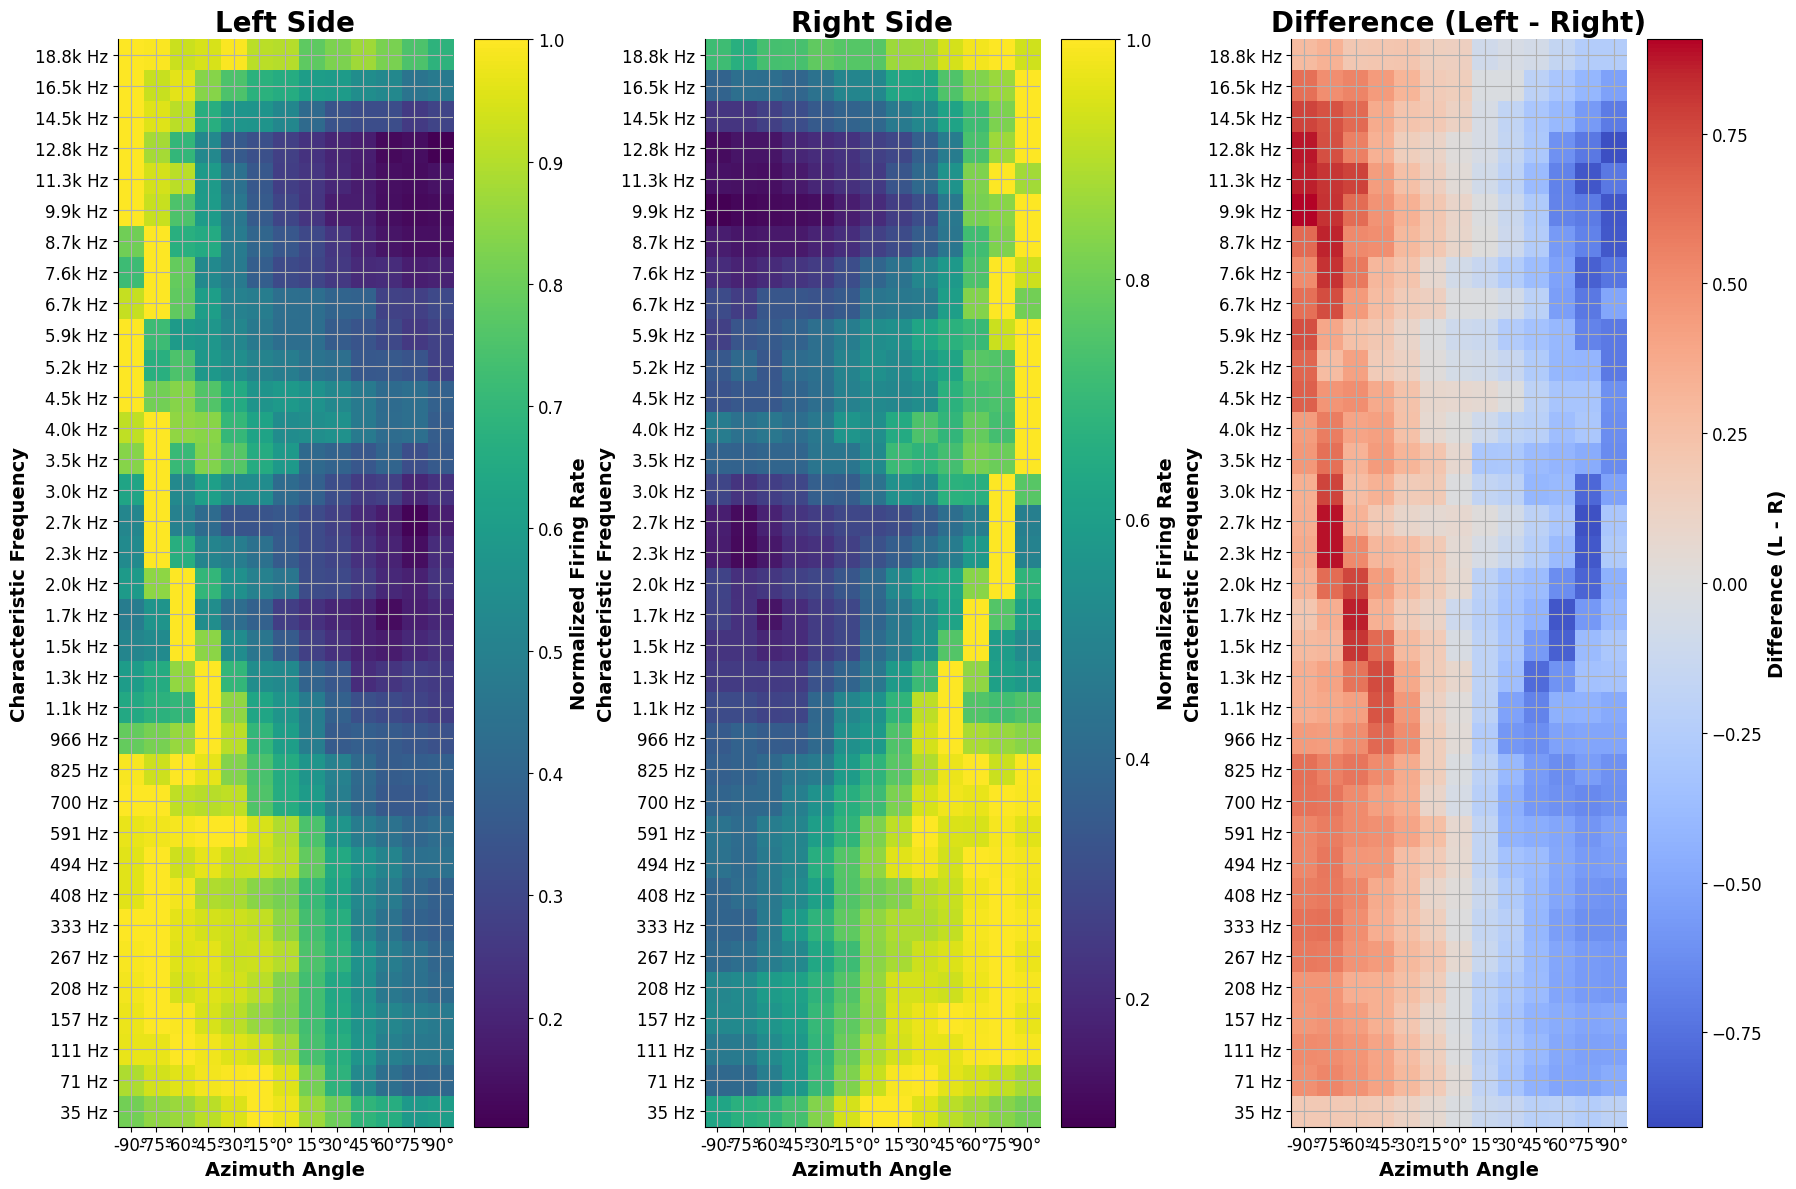

itd_only


: 

In [5]:
for f in sounds:
    print(f, '\n')
    for cue in cues:
        print(cue)
        title = f'{f}_70dB&TanCarney&{cue}.pic'
        result_path = result_dir + title
        with open(result_path, "rb") as file:
            result = dill.load(file, ignore=True)
            
        draw_rate_vs_angle_pop(
            data = result,
            pop = pop,
            rate = False,
            ylim = ylim
        )  

        draw_spikes_and_psth_bothside(
            res = result,
            angle = 0,
            pop = pop,
            xlim = [0,100]
        )

        fig = plot_tonotopic_heatmaps(
            data=result,
            pop=pop,
            num_cells_per_interval=50,
            title=None,
            figsize=(18, 12)
        )
        plt.show()
        # Free memory
        del result
        gc.collect()
        # Free memory

# Cochlear Analysis

tone_10.kHz 

subject_1


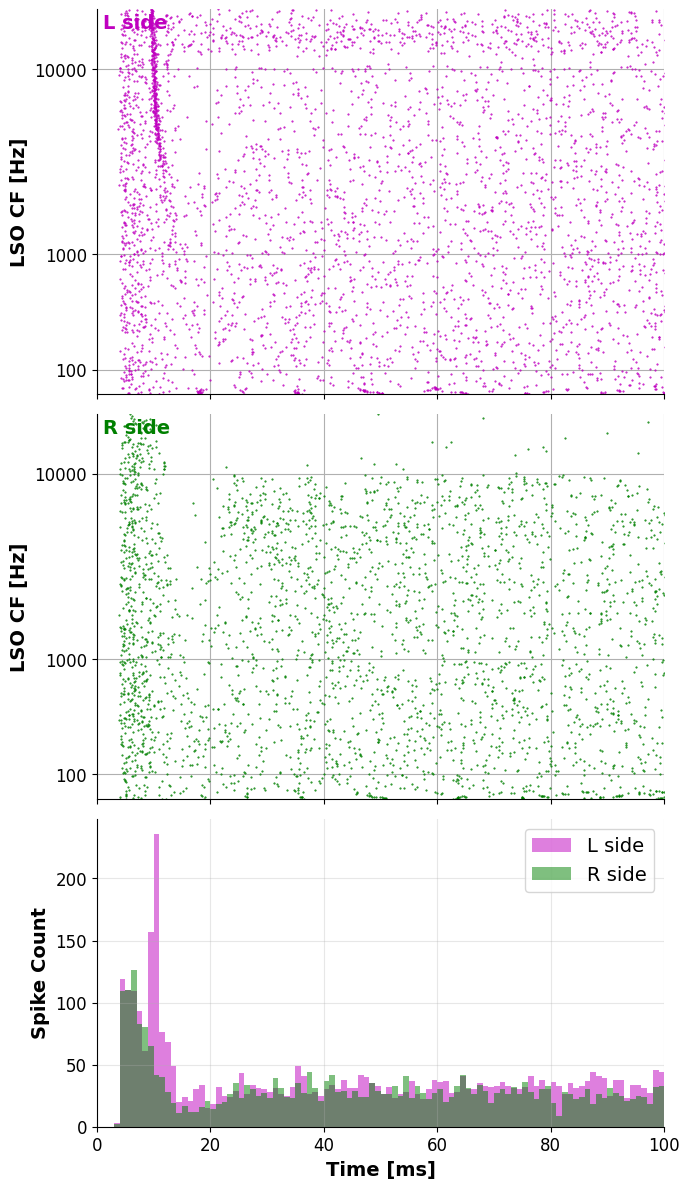

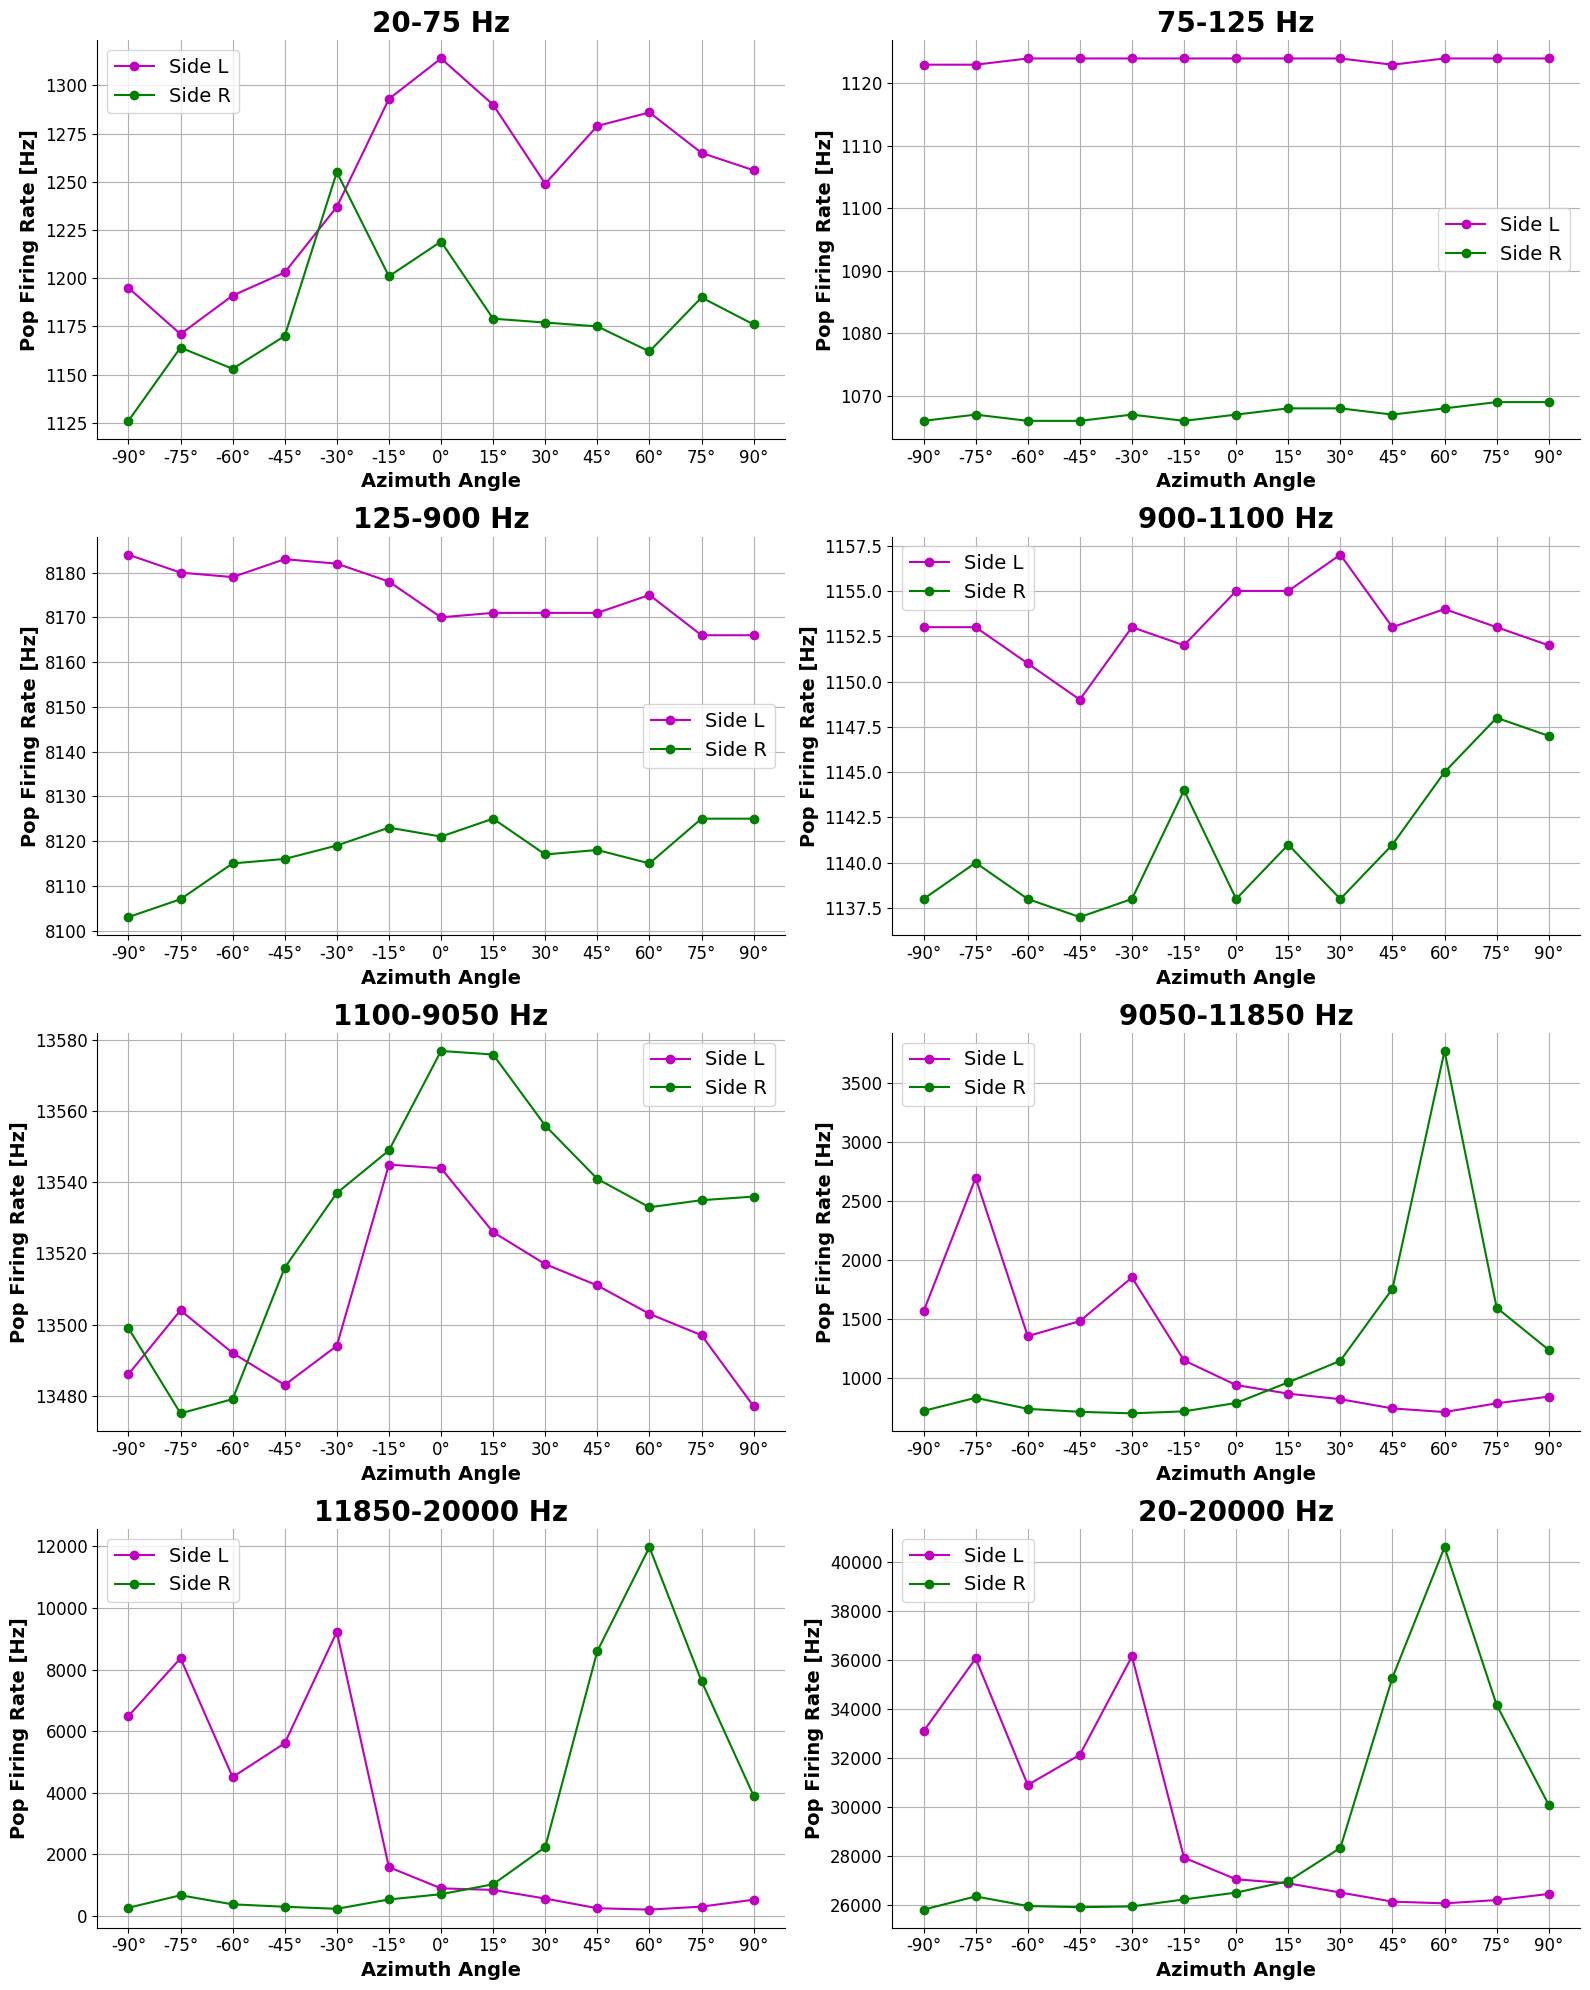

itd_only


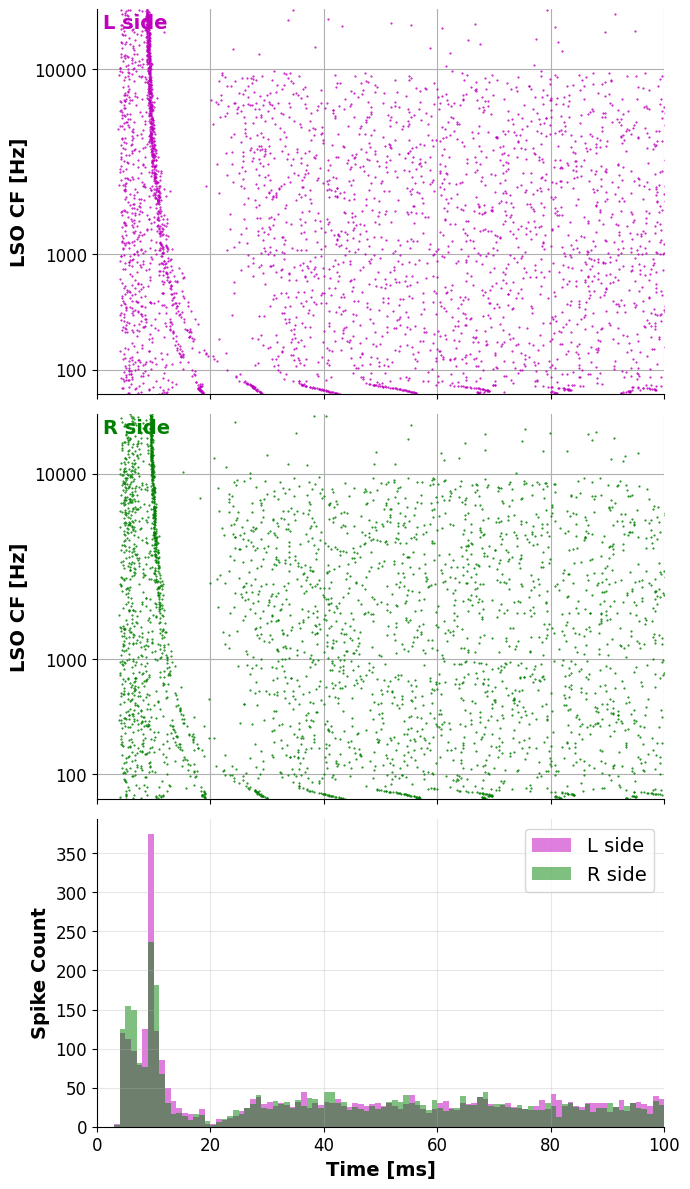

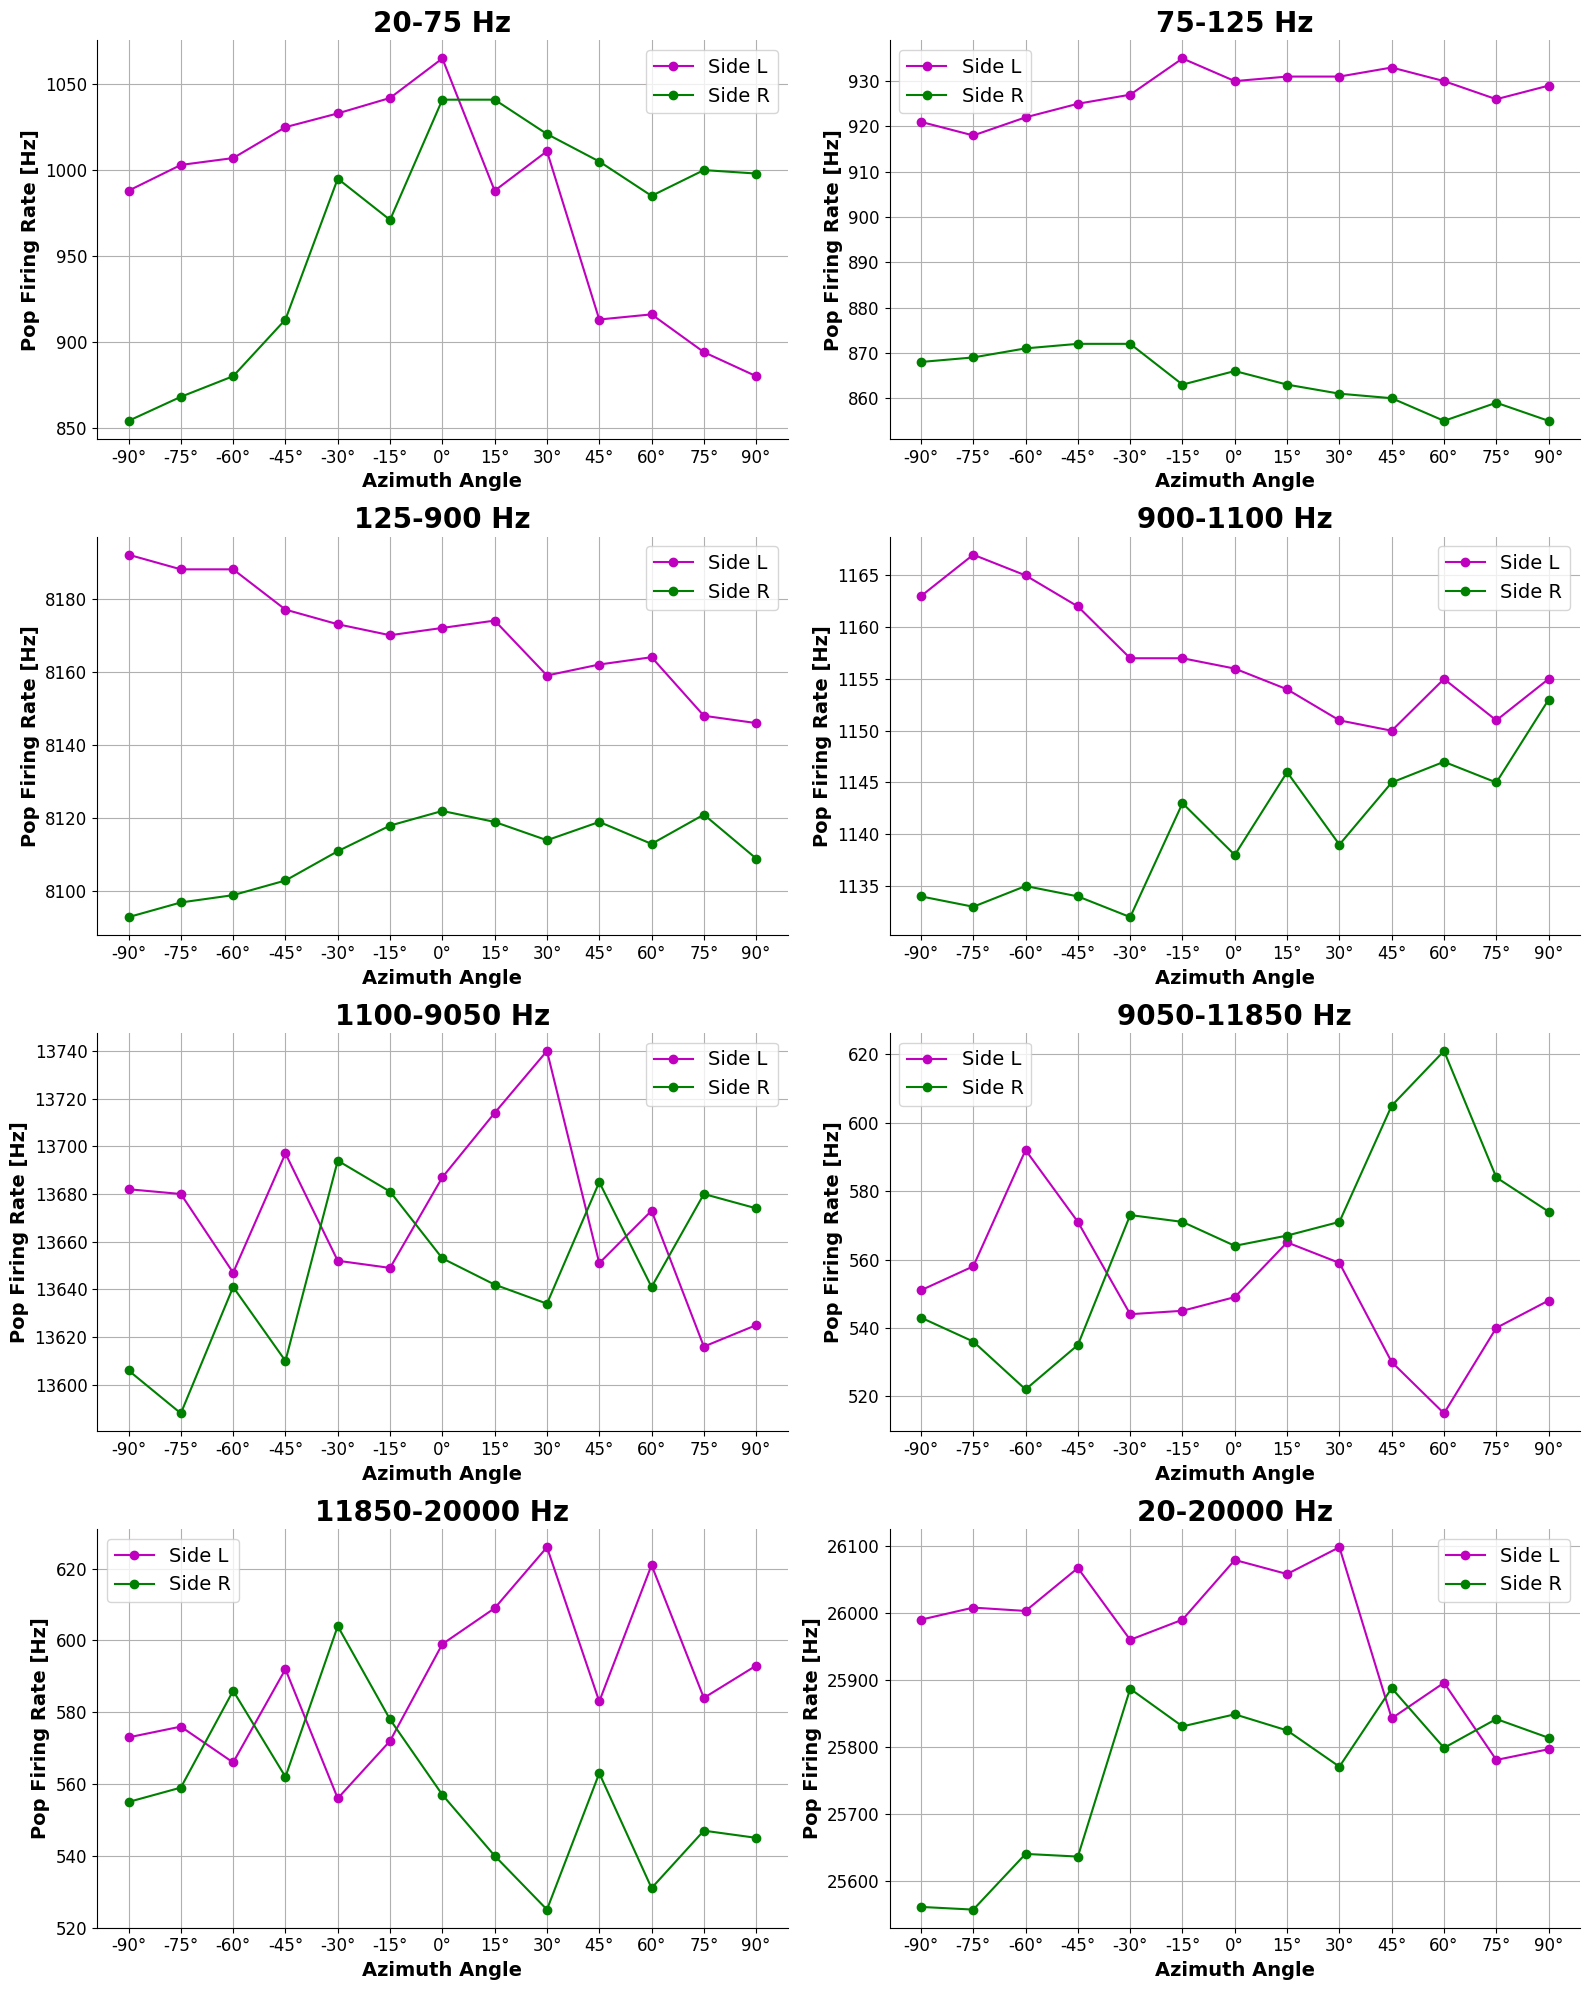

ild_only


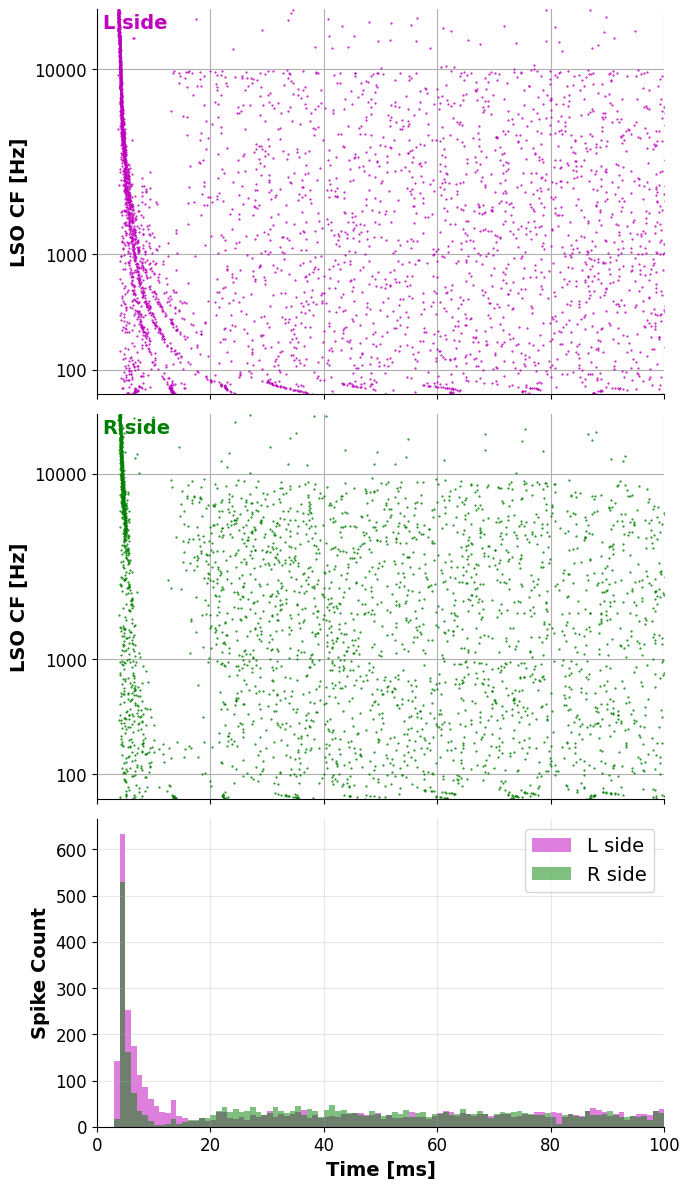

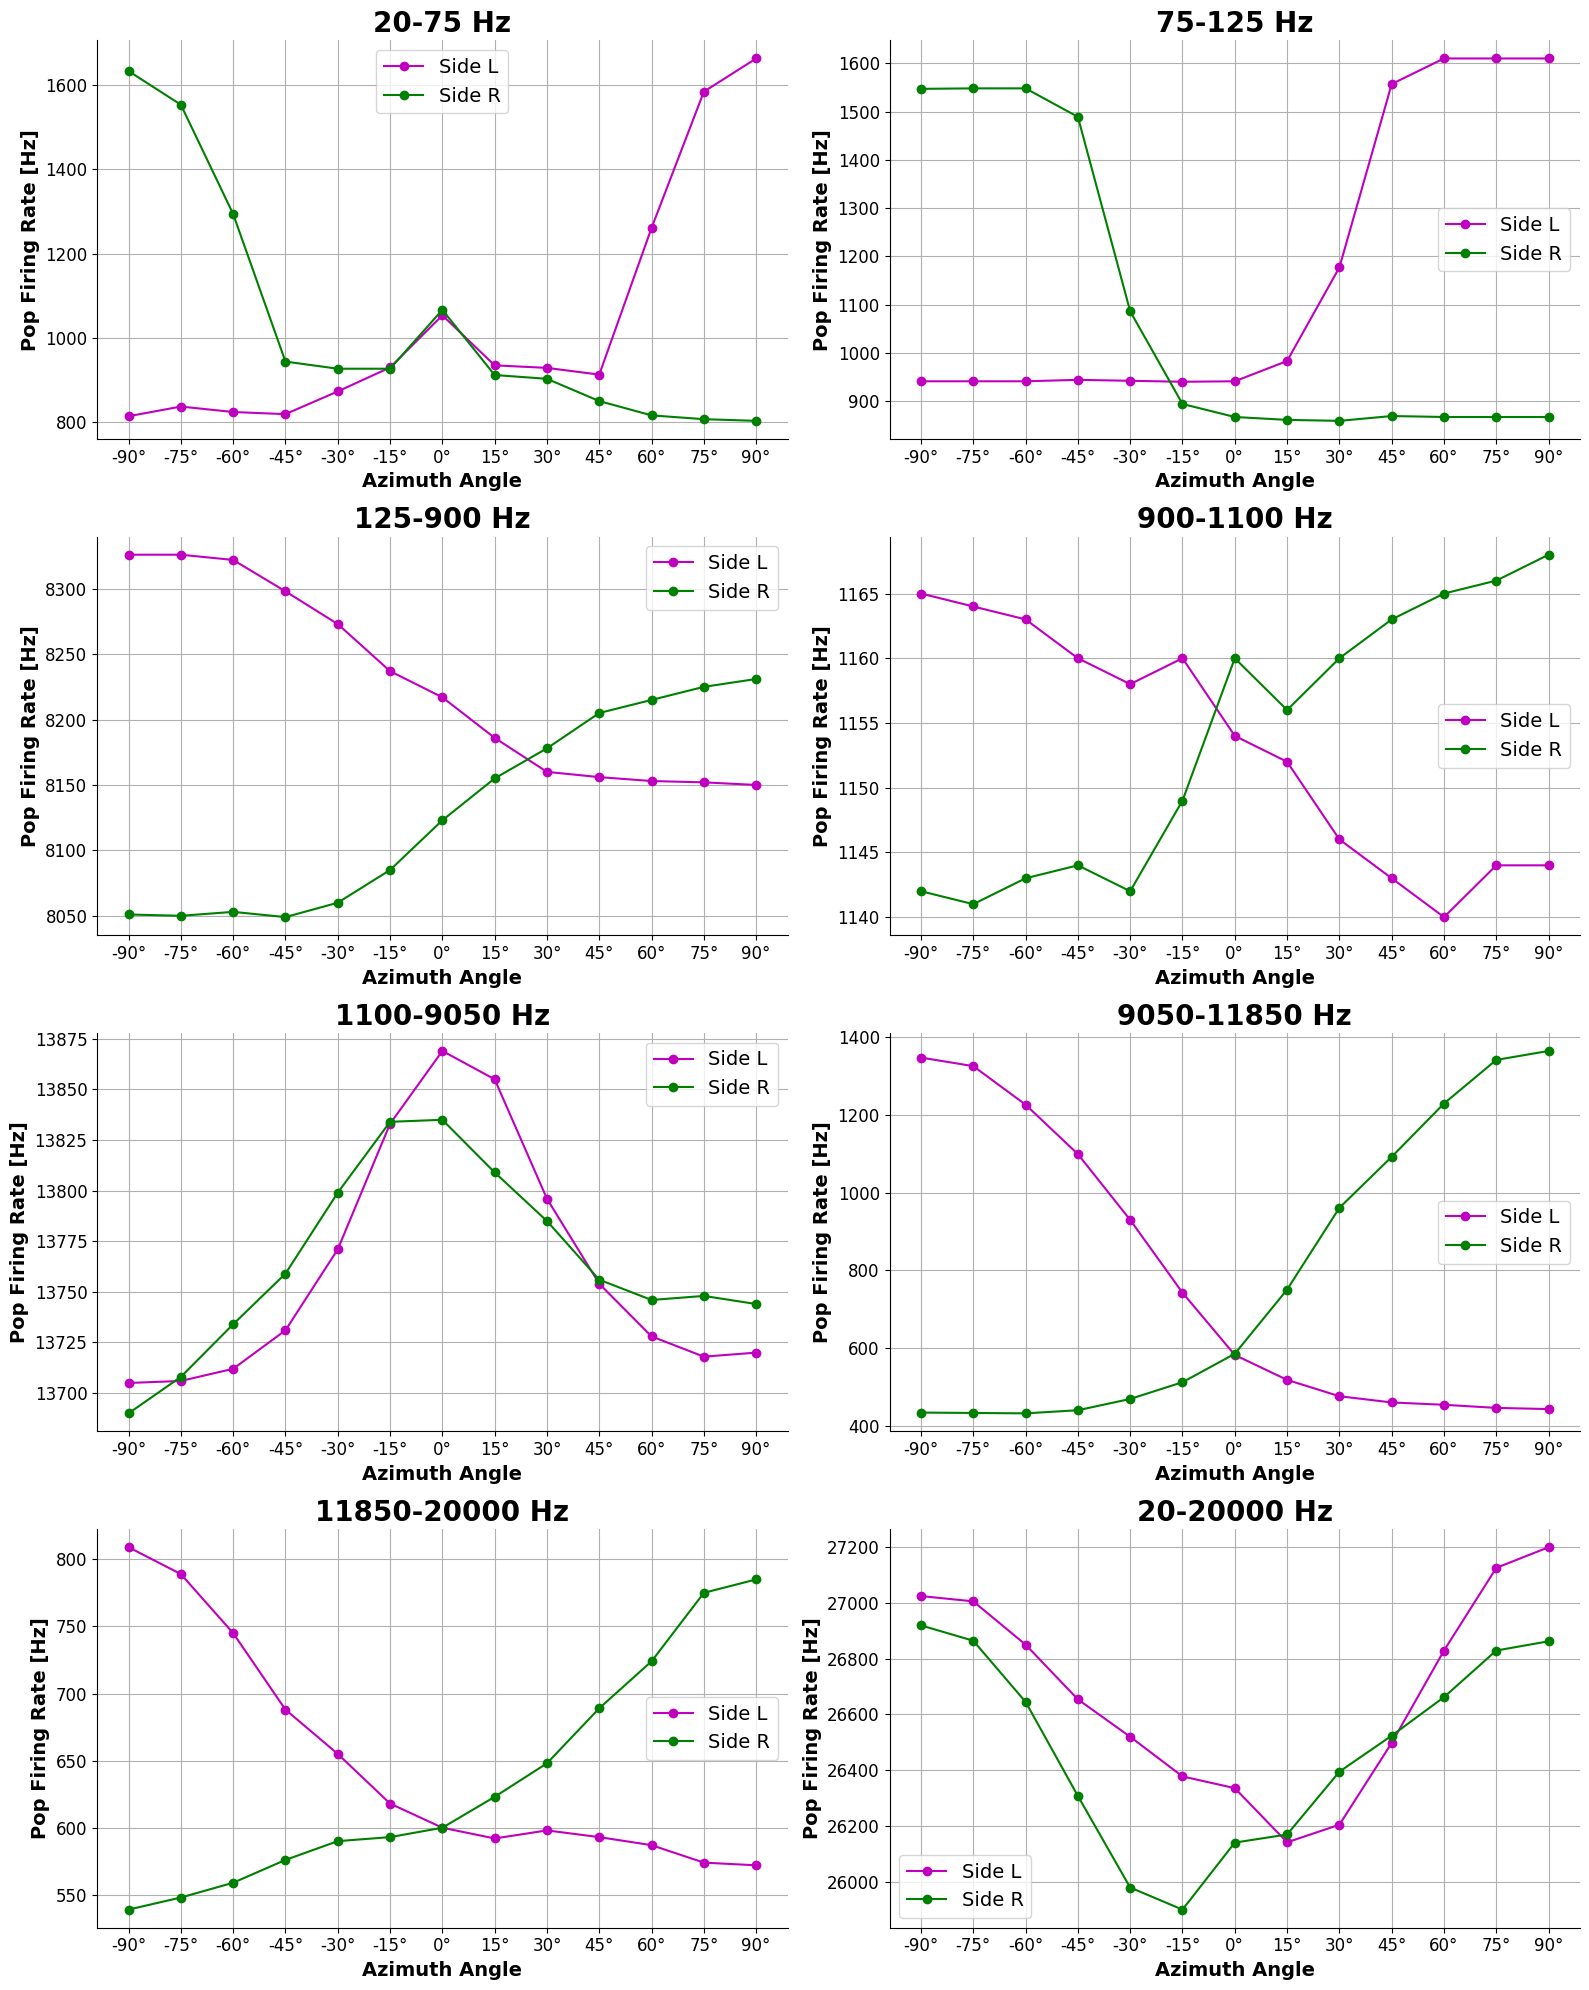

In [ ]:
intervals = [[20,75], [75,125], [125,900], [900,1100], [1100,9050], [9050,11850], [11850, 20000], [20,20000]]

for f in sounds:
    print(f, '\n')
    for cue in cues:
        print(cue)
        title = f'{f}_70dB&TanCarney&{cue}.pic'
        result_path = result_dir + title

        with open(result_path, "rb") as file:
            result = dill.load(file, ignore=True)

        draw_spikes_and_psth_bothside(
            res = result,
            angle = 0,
            pop = pop,
            xlim = [0,100]
        )
        
        plot_cf_intervals_grid(data=result, intervals=intervals, pop=pop, rate=False)

        del result
        gc.collect()
